### Helper functions for parsing sentences

Let's define some helper functions to make our lives easier in parsing sentences from a file.

In [1]:
def parse_sentence(grammar, sentence, verbose=False):
    """
        returns the most probable parse
        verbose=True prints errors if cannot parse a sentence
    """
    tokens = sentence.split()
    try:
        tree = grammar.get_most_probable_parse(tokens)
        if (tree is None) and verbose:
            print(f'no parse tree found for `{sentence}`')
        return tree
    except ValueError as e:
        if verbose:
            print(f'cannot parse `{sentence}`')
            print(e)
        return None


def parse_many_sentences(grammar, sentences, verbose=False):
    """
        returns the most probable parse for a list of sentences
        verbose=True prints errors if cannot parse a sentence
    """
    parse_trees = []
    for line in sentences:
        parse_trees.append(parse_sentence(grammar, line, verbose))
    return parse_trees


def read_file_lines(text_file):
    """
        reads the text_file
        returns a list of uncommented lines
    """
    lines = []
    with open(text_file, 'r') as f:
        for line in f:
            line = line.strip()
            if line.startswith('#'):
                continue  # comment
            lines.append(line)
    return lines


def parse_file(grammar, text_file, verbose=False):
    """
        returns the most probable parse for sentences in the file
        verbose=True prints errors if cannot parse a sentence
    """
    sentences = read_file_lines(text_file)
    return parse_many_sentences(grammar, sentences, verbose)


def cross_entropy_file(grammar, text_file, verbose=False):
    """
        returns the cross_entropy score of parse for sentences in the file
        verbose=True prints errors if cannot parse a sentence
    """
    return grammar.get_cross_entropy_over_sentences(read_file_lines(text_file), verbose)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import nltk

from tools import PcfgGrammar, PcfgGenerator, flatten_tree
from nltk import Nonterminal
from nltk.grammar import ProbabilisticProduction

s1_grammar = PcfgGrammar.read_grammar(grammar_files=['./main-data/starter/S1.gr', './main-data/starter/S1_Vocab.gr'],
                                      allowed_words_file='./main-data/allowed_words.txt')
s2_grammar = PcfgGrammar.read_grammar(grammar_files=['./main-data/starter/S2.gr', './main-data/starter/S2_Vocab.gr'],
                                      allowed_words_file='./main-data/allowed_words.txt')

merged_grammar = PcfgGrammar.read_grammar(grammar_files=['./main-data/starter/S1.gr',
                                                         './main-data/starter/S1_Vocab.gr',
                                                         './main-data/starter/S2.gr',
                                                         './main-data/starter/S2_Vocab.gr'],
                                          allowed_words_file='./main-data/allowed_words.txt')

### Base

In [3]:
# Ungrammatical Generated Sentences

base_trees_PCFG = parse_file(s1_grammar, './main-data/base-set.sen', verbose=True)

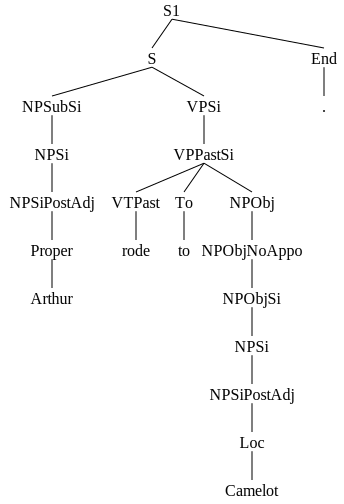

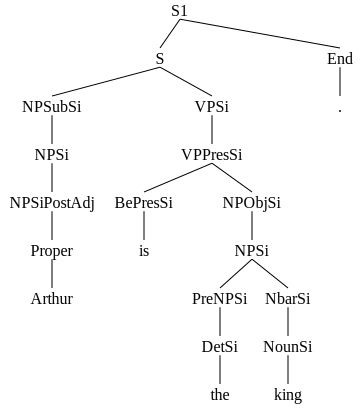

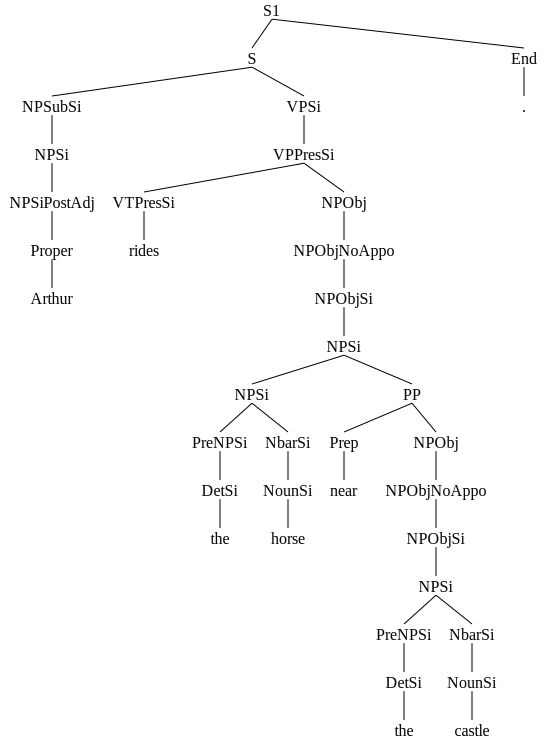

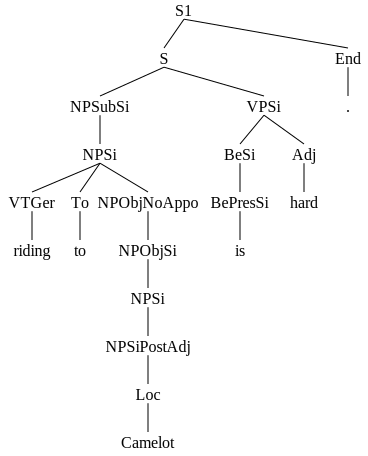

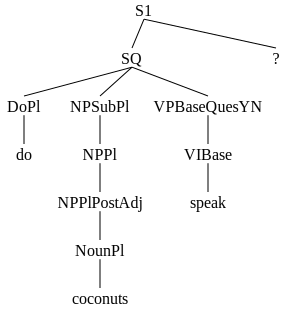

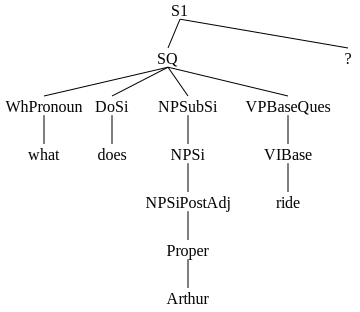

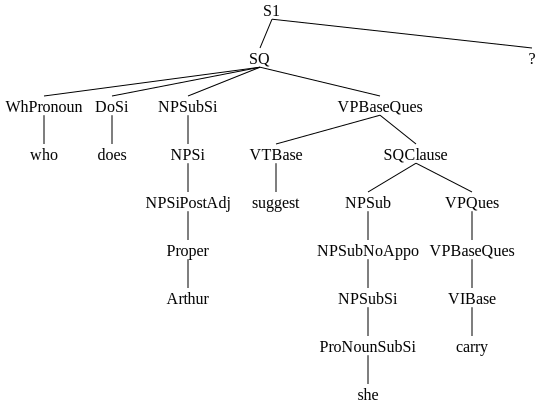

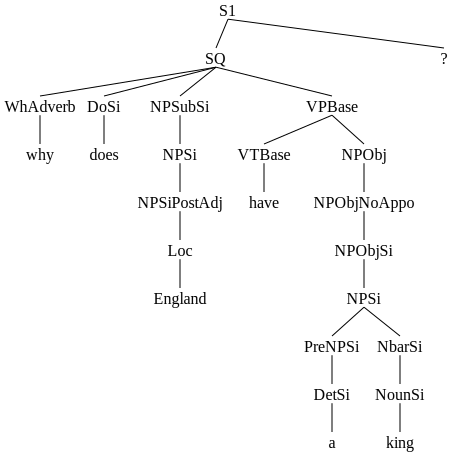

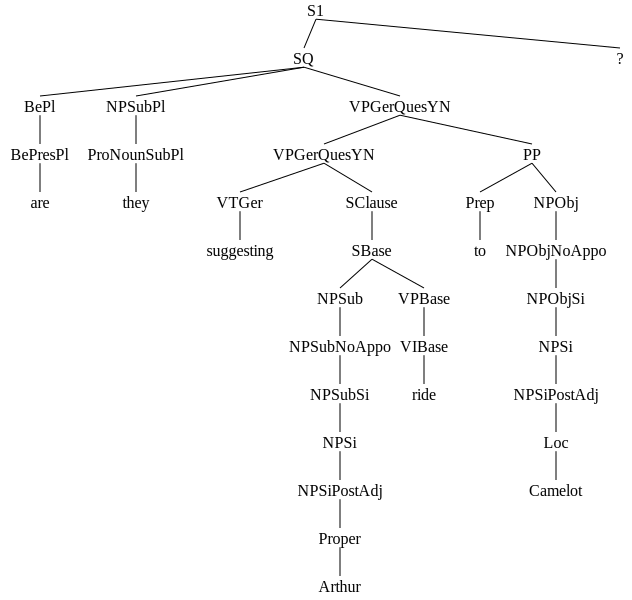

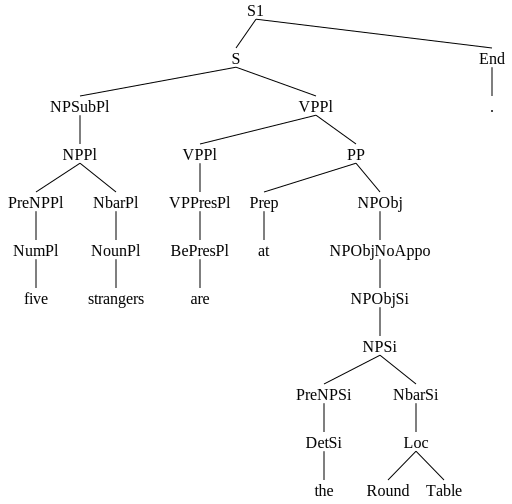

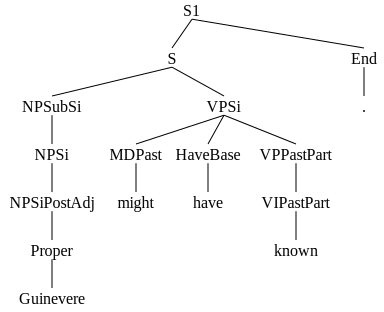

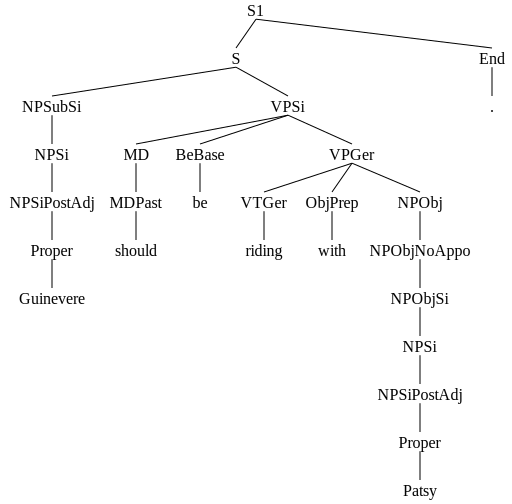

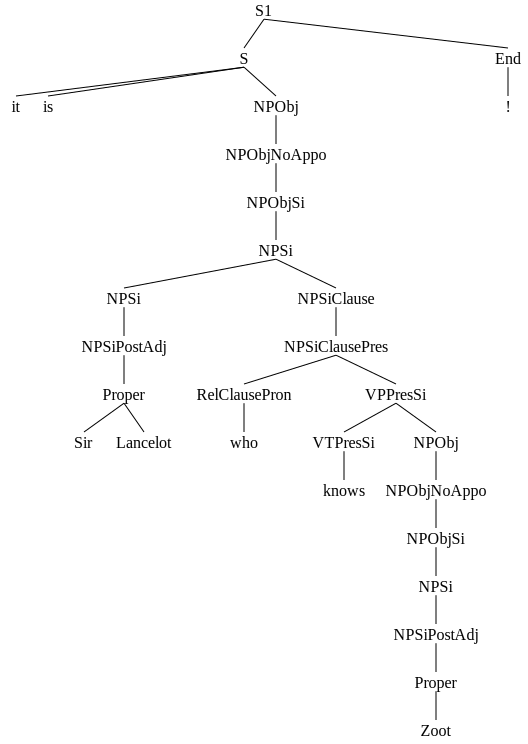

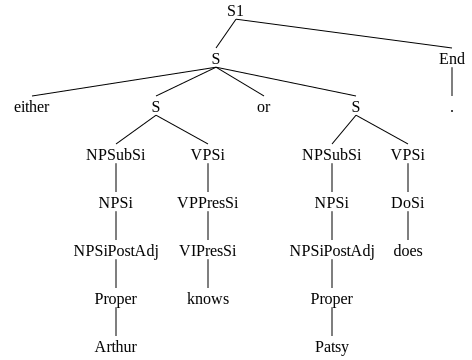

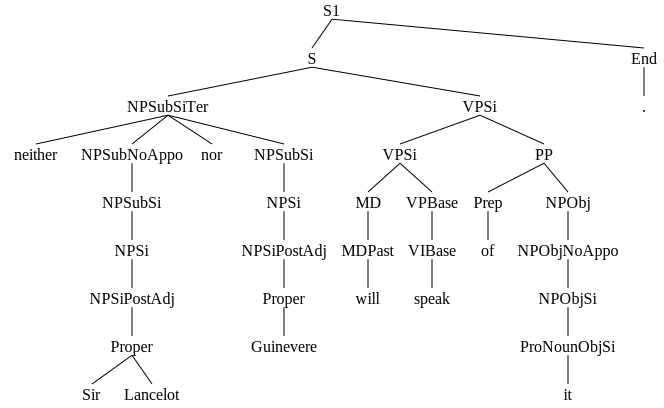

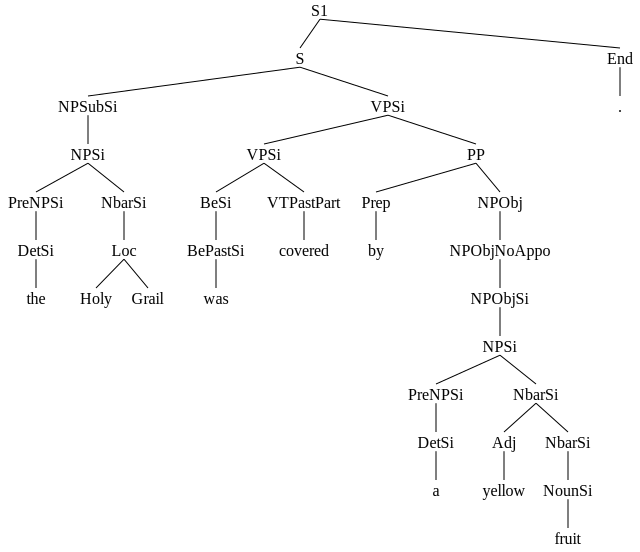

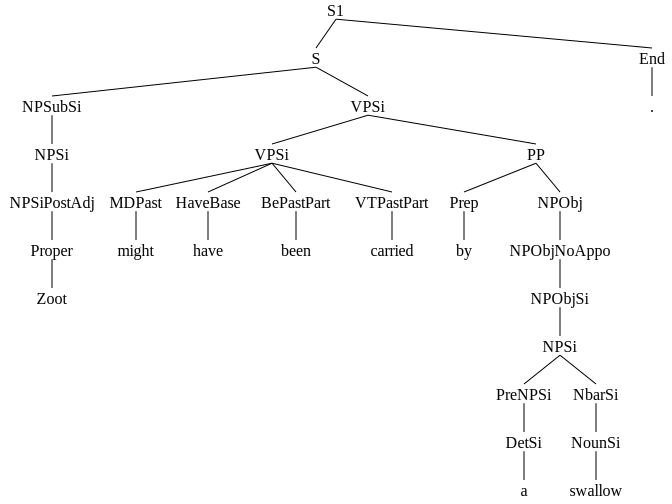

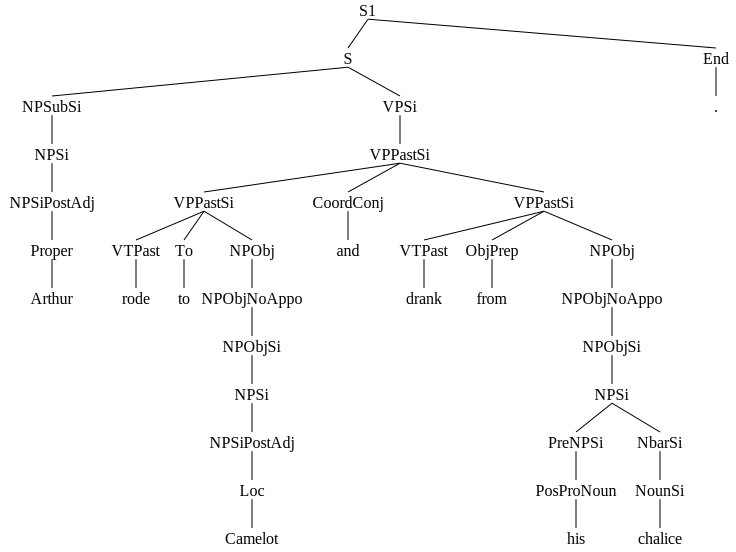

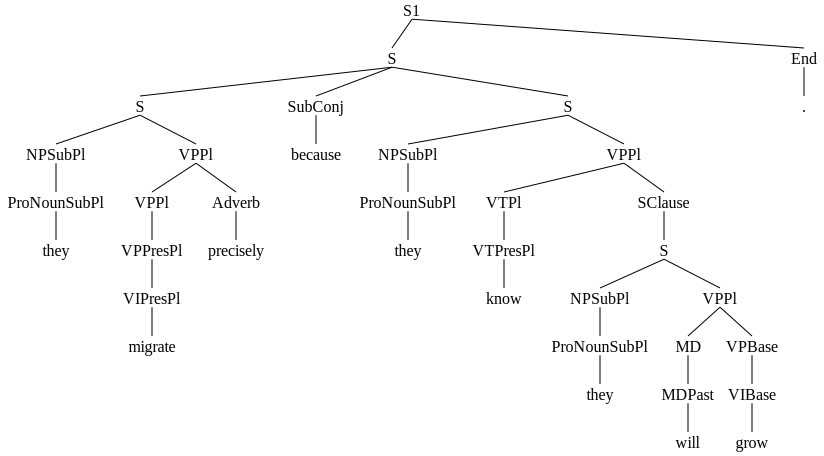

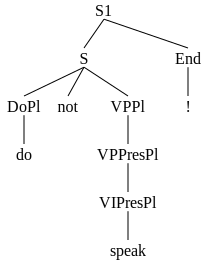

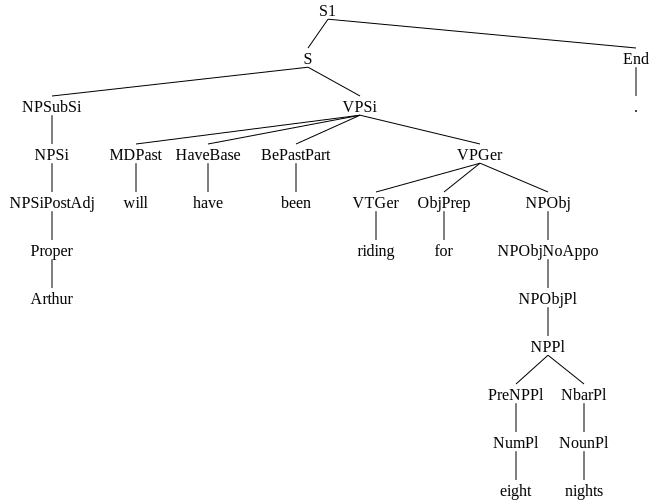

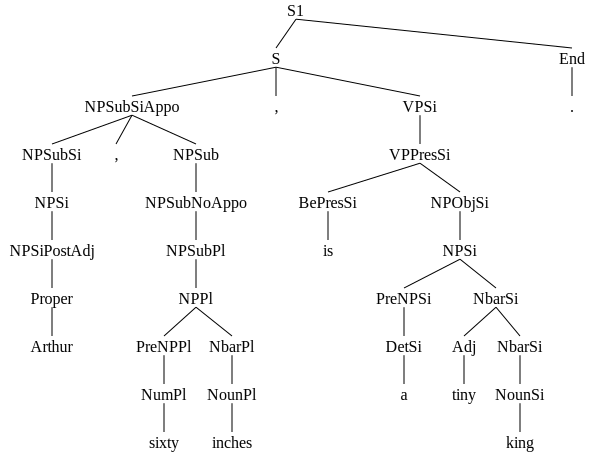

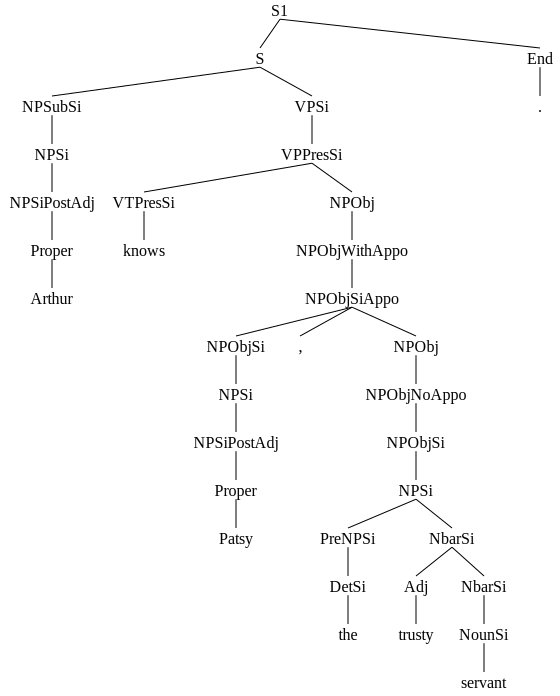

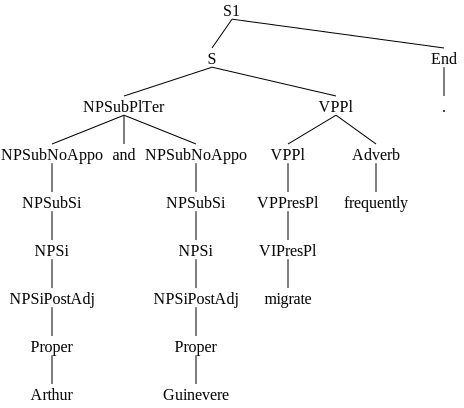

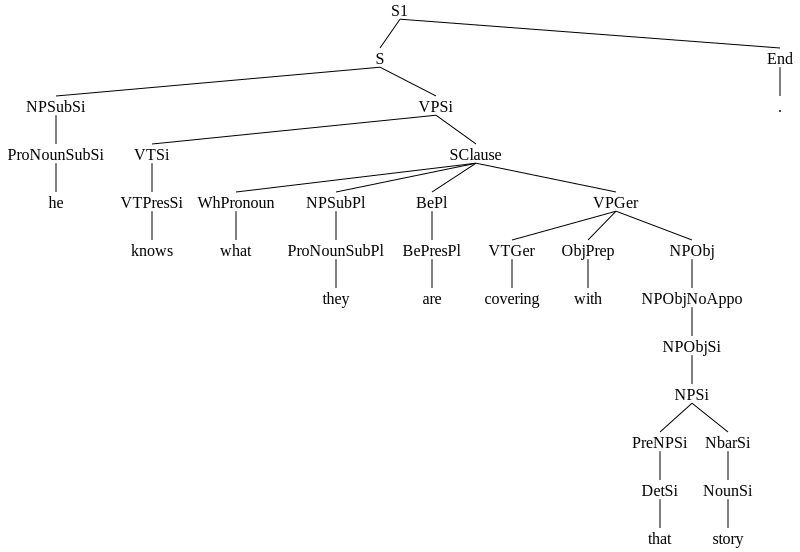

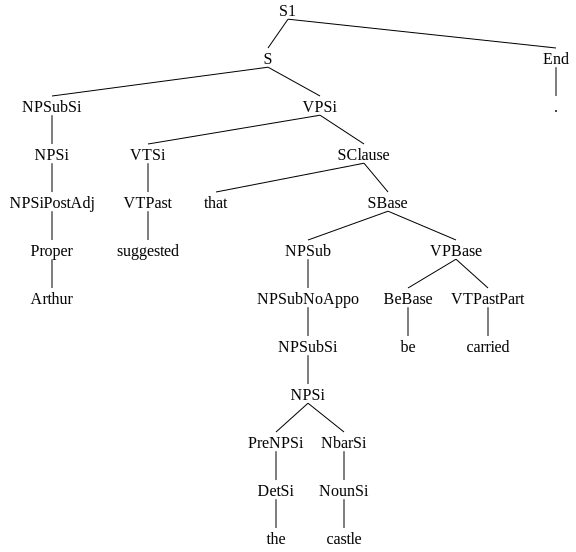

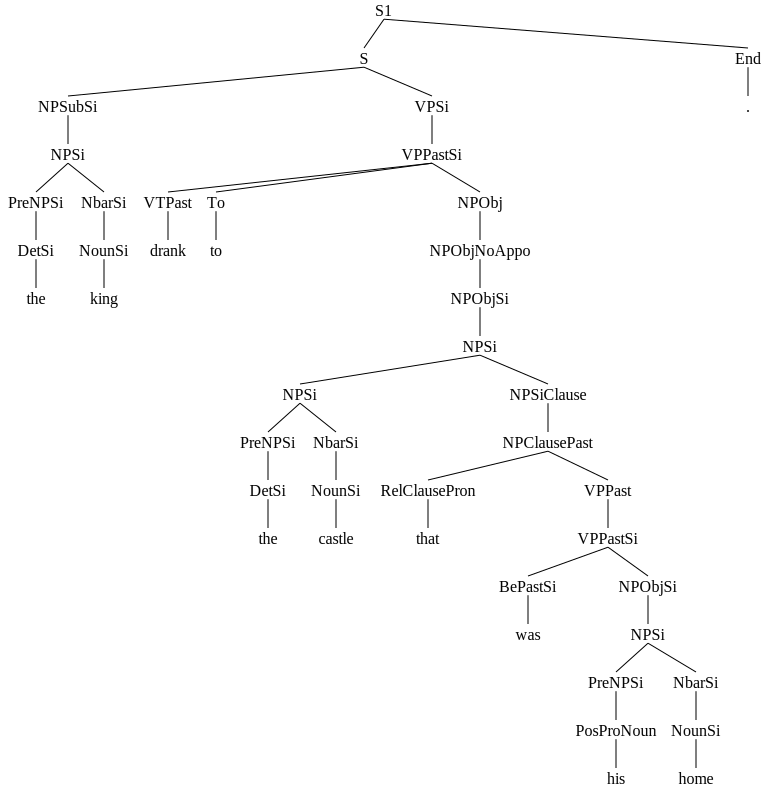

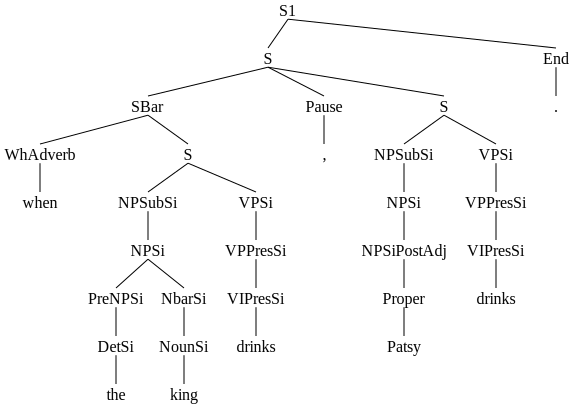

In [5]:
base_trees_PCFG_S1 = []
for tree in base_trees_PCFG:
    base_trees_PCFG_S1.append(tree[0])
    display(tree[0])

In [6]:
import pickle

save_dir = "D:\\MIT\\Courses\\2023-Spring\\6.8630-NLP\\Final Project\\LLM CGW\\All Parse Trees\\Trees"

with open(save_dir+'\\PCFG_Base_Trees.pkl', 'wb') as f:
    pickle.dump(base_trees_PCFG_S1, f)

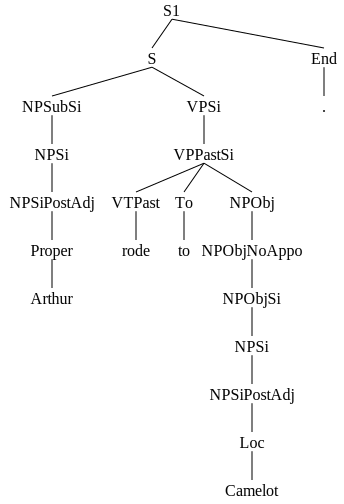

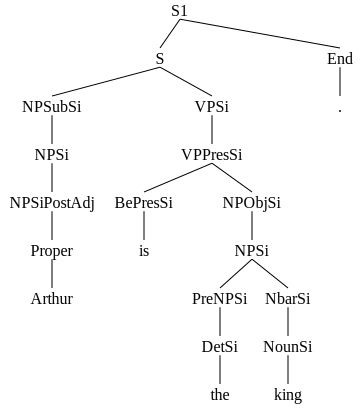

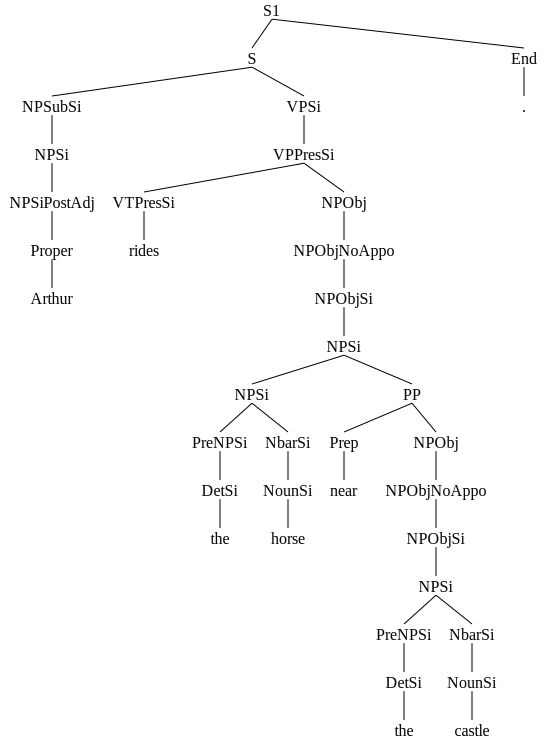

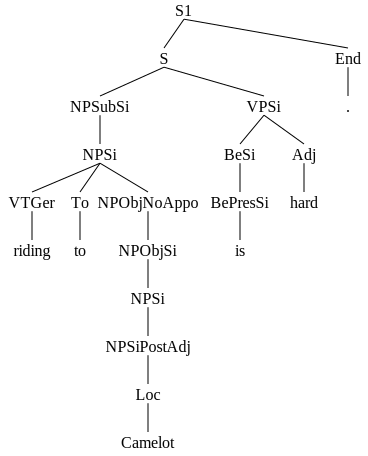

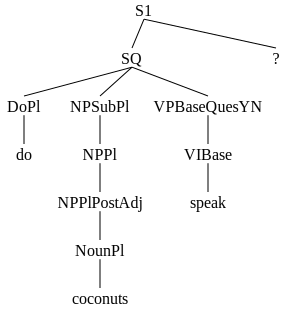

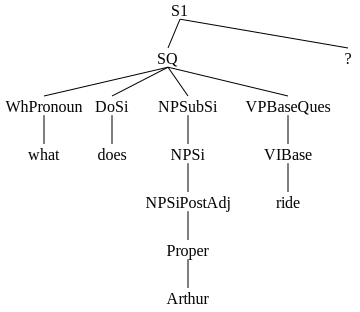

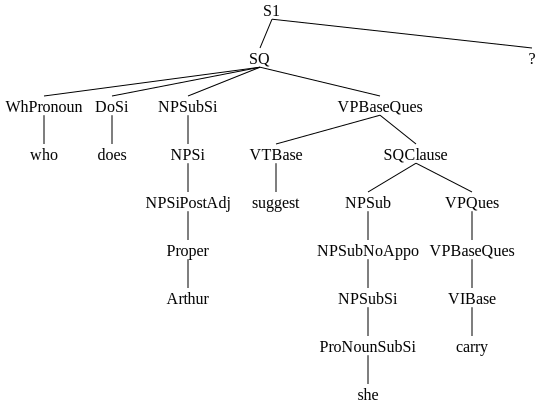

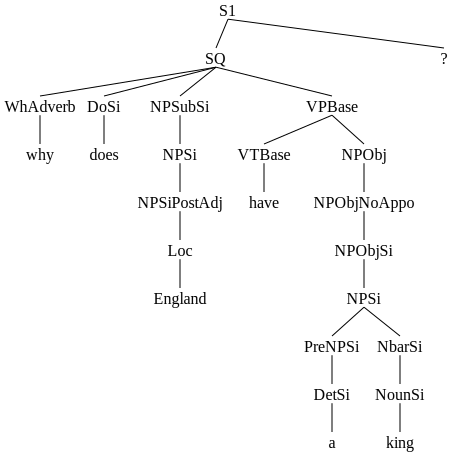

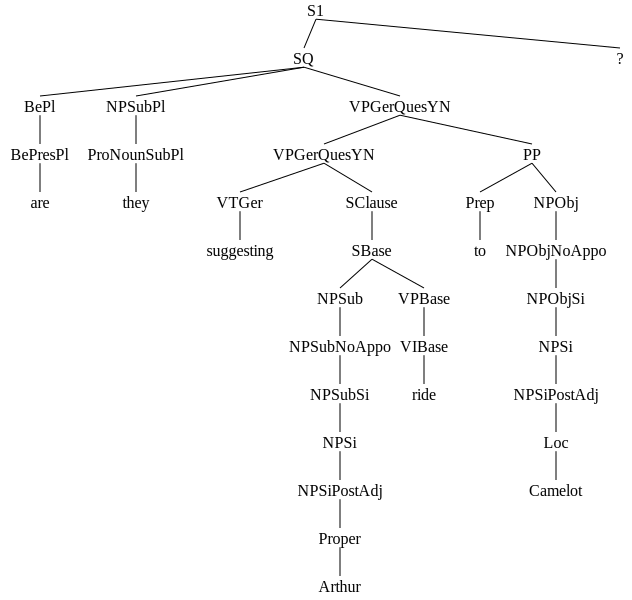

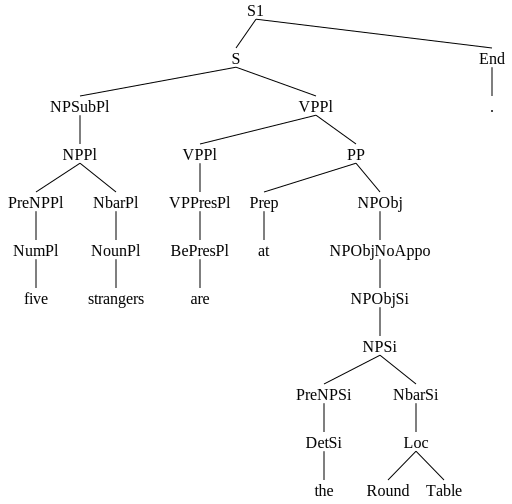

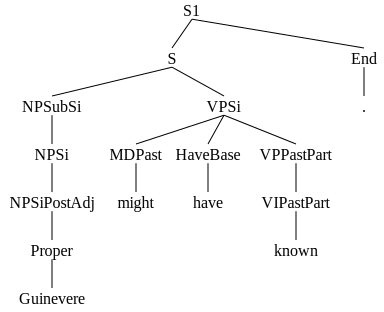

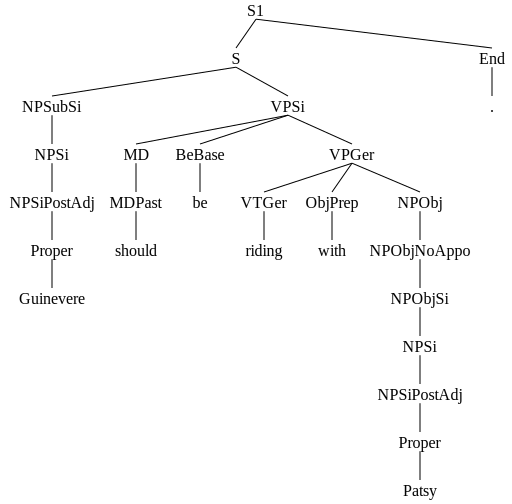

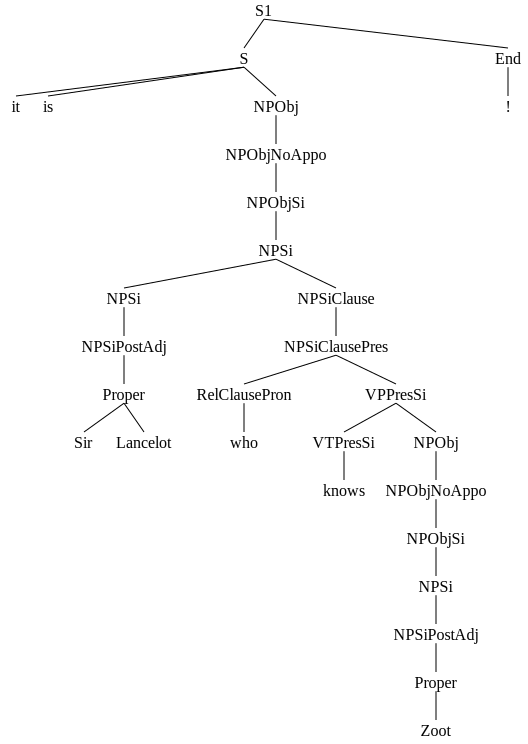

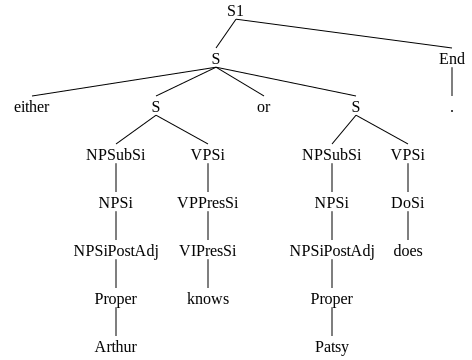

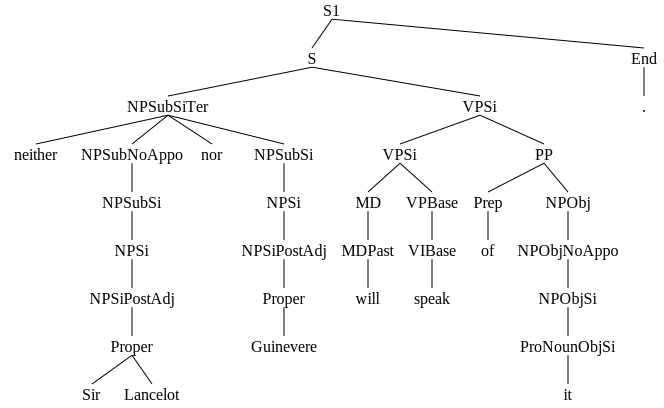

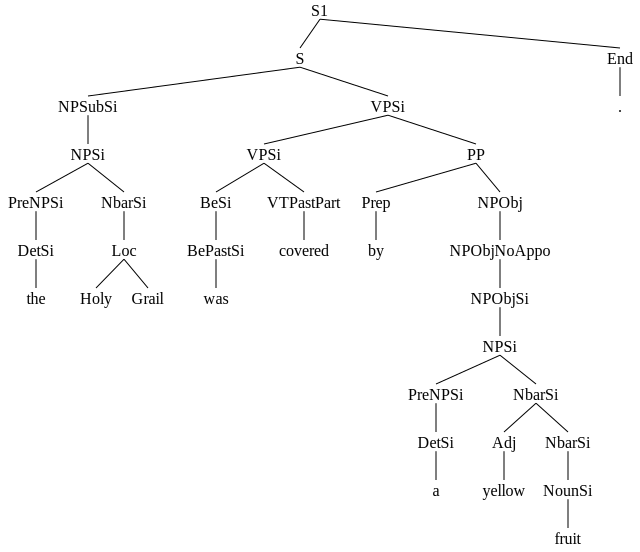

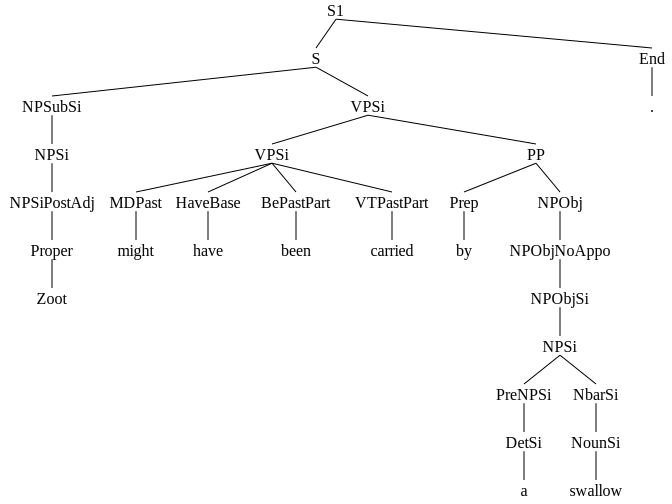

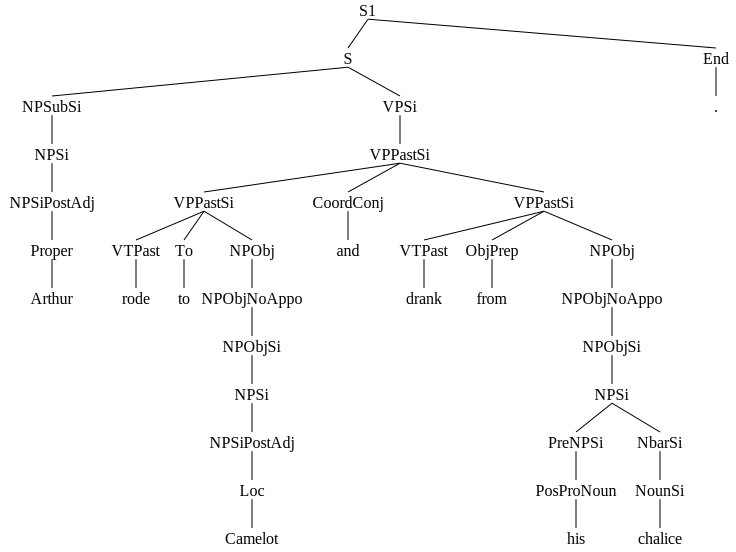

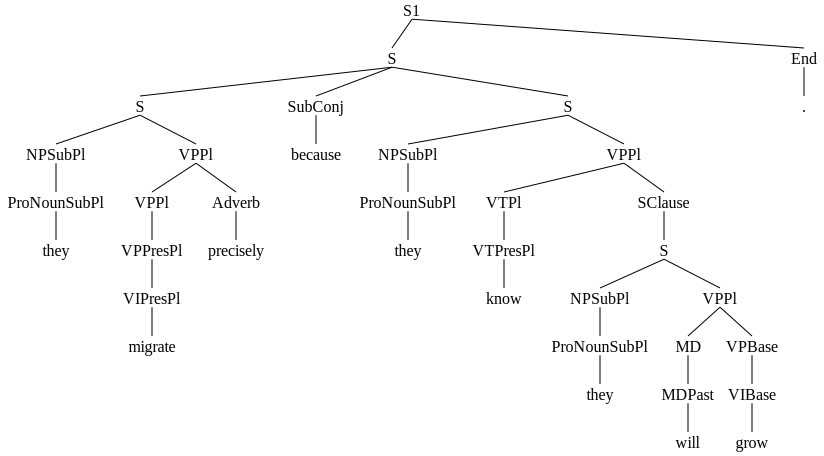

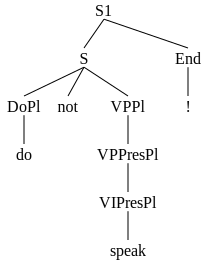

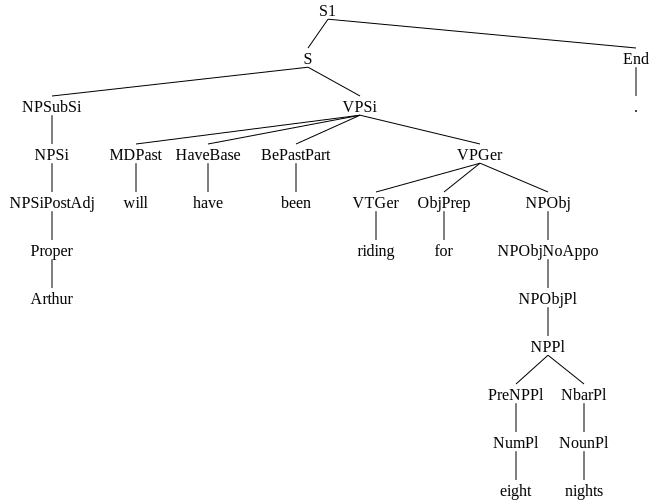

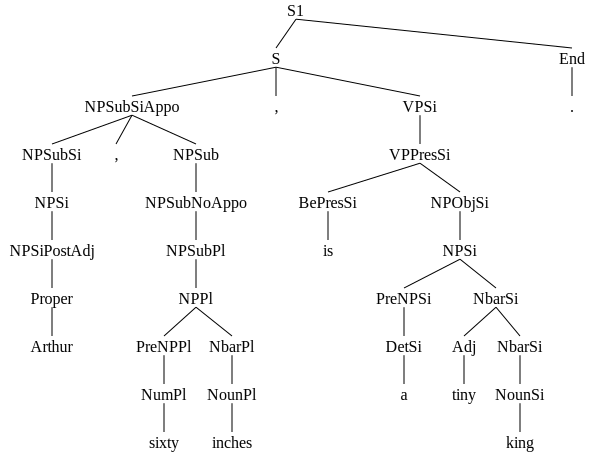

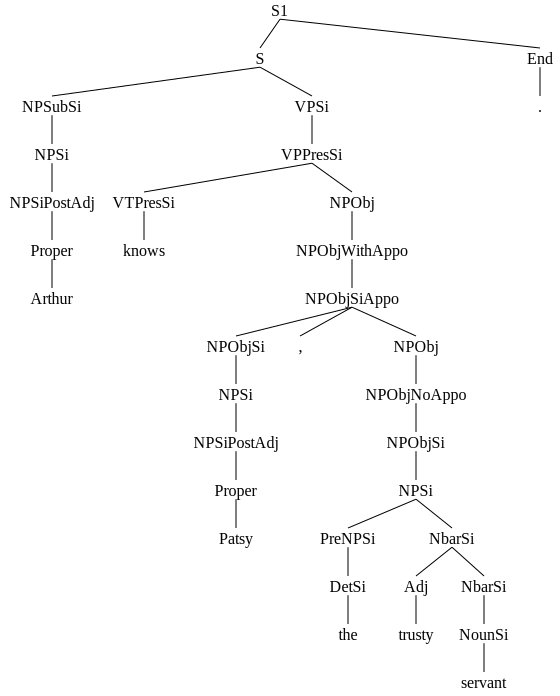

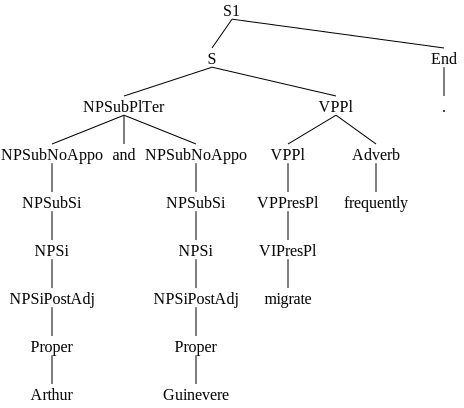

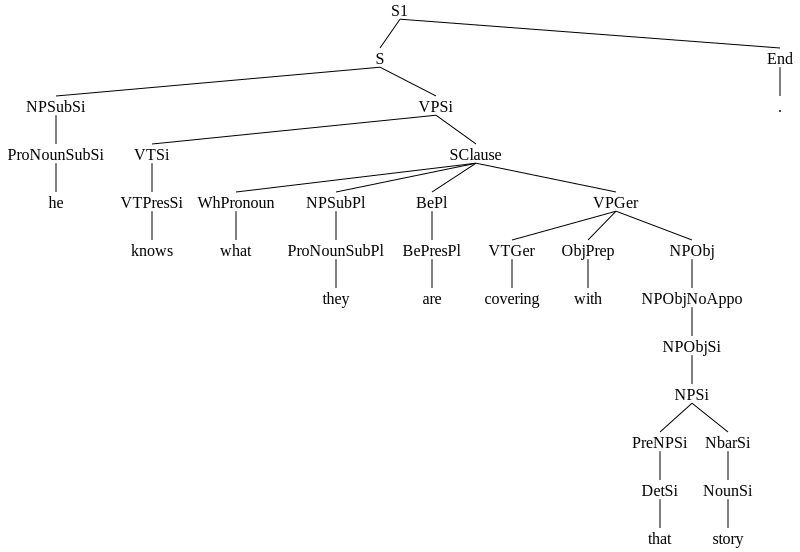

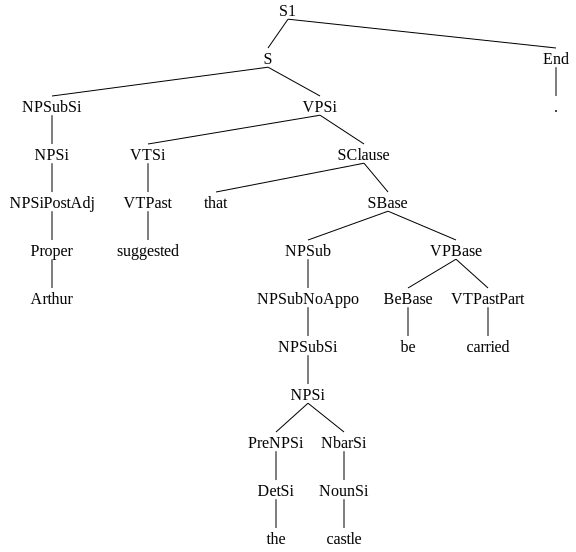

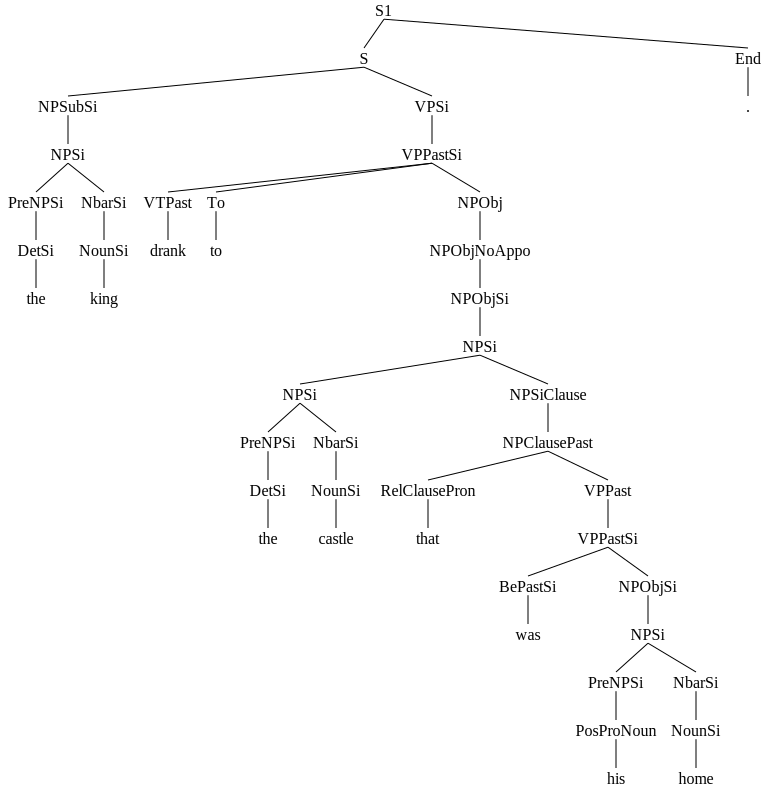

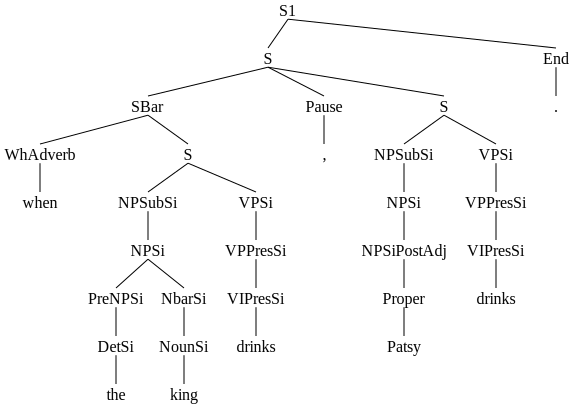

In [7]:
with open(save_dir+'\\PCFG_Base_Trees.pkl', 'rb') as f:
    trees = pickle.load(f)

for tree in trees:
    display(tree)

### Adversarial

In [8]:
# Ungrammatical Generated Sentences

adversarial_trees_PCFG = parse_file(s1_grammar, './main-data/adversarial_set.sen', verbose=True)

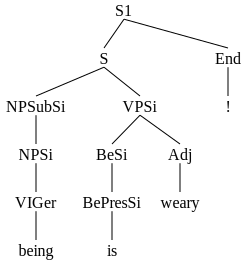

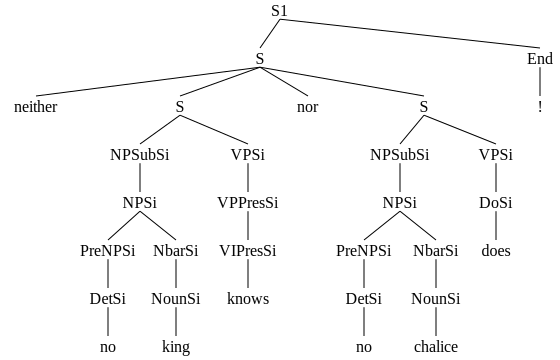

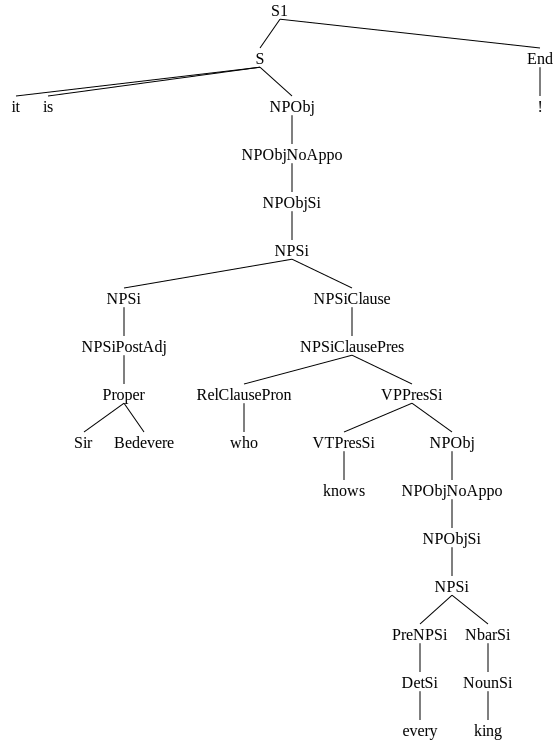

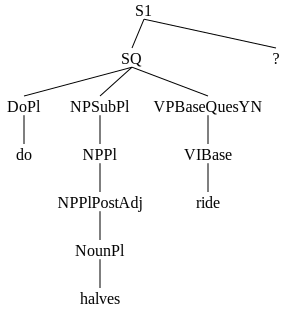

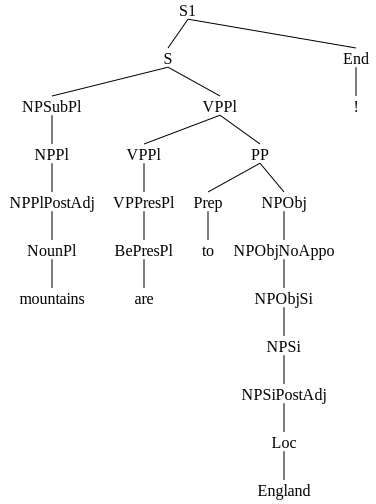

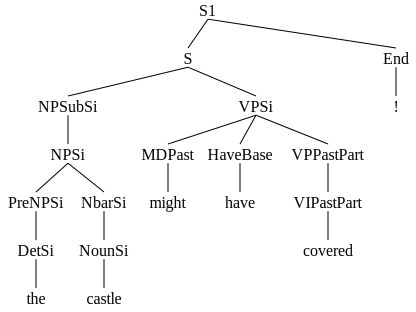

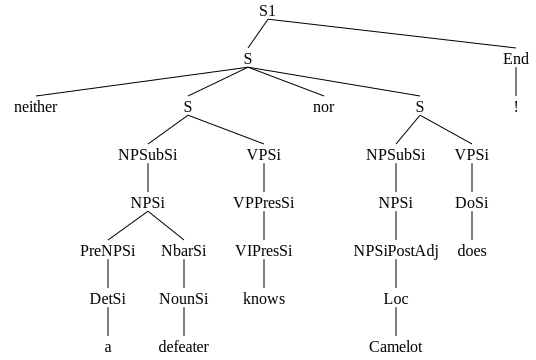

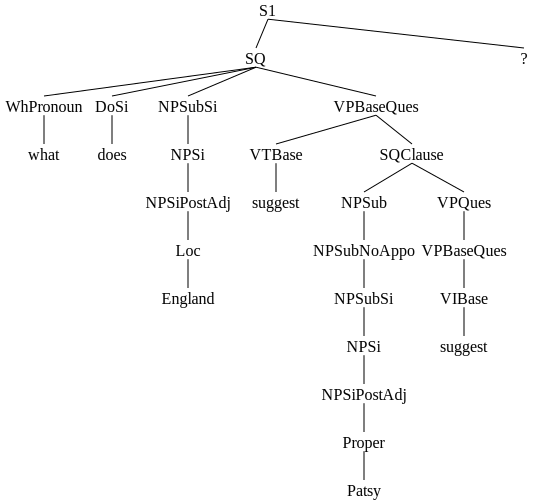

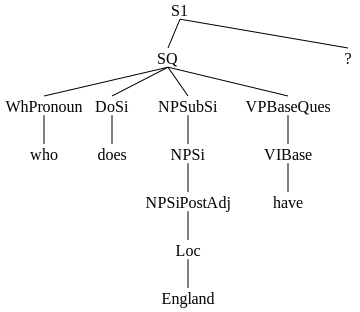

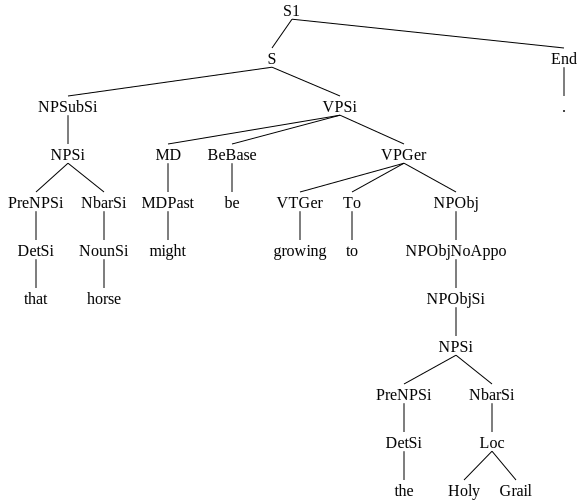

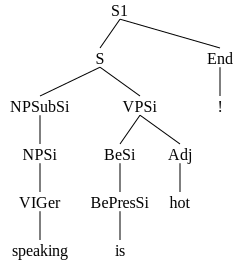

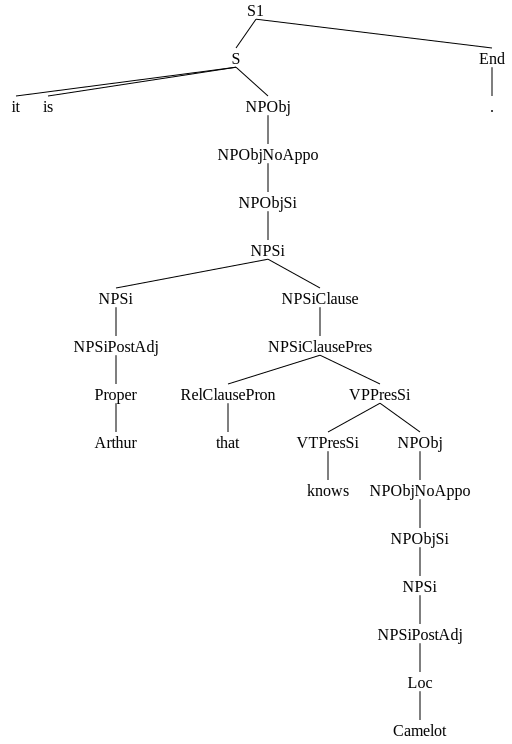

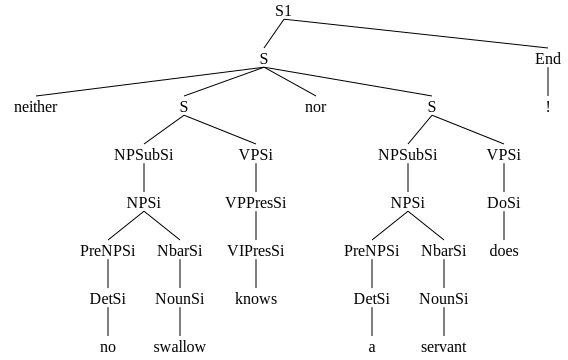

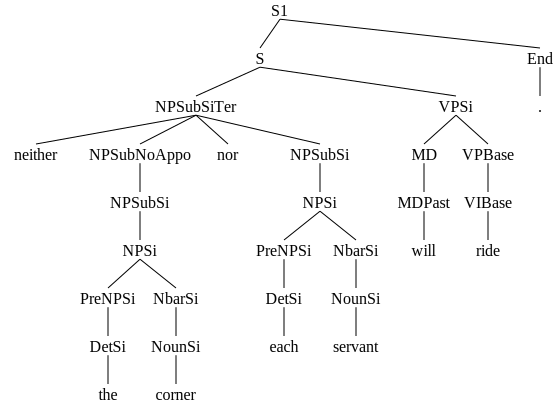

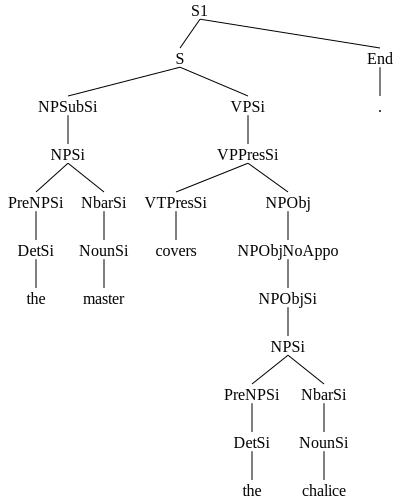

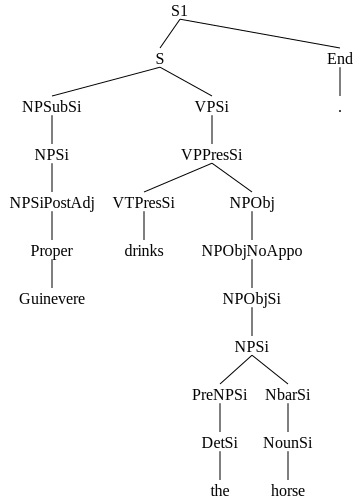

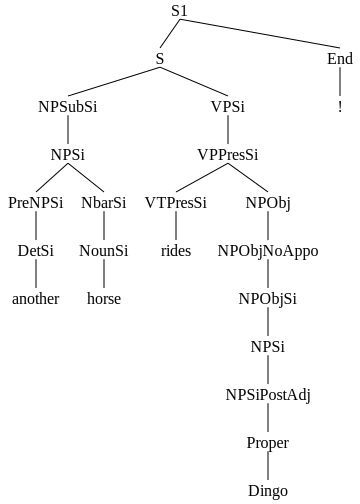

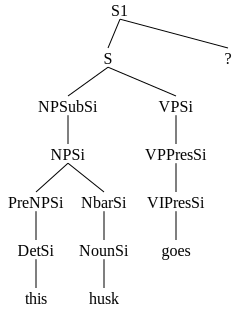

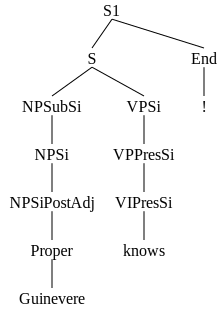

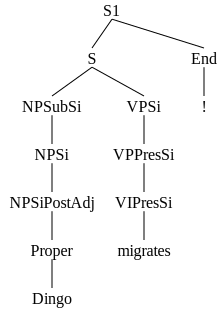

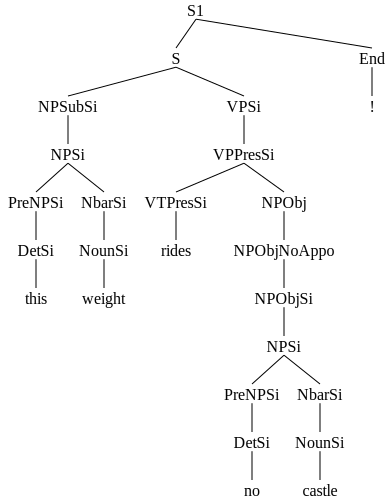

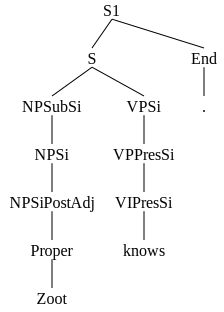

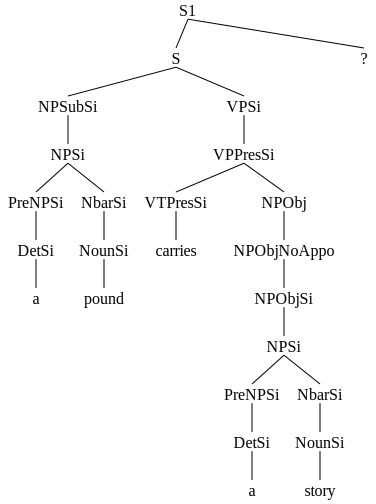

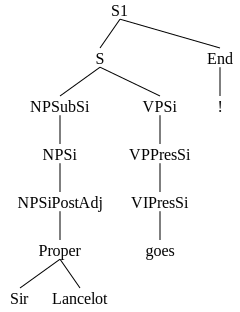

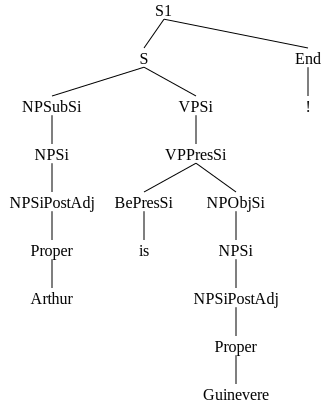

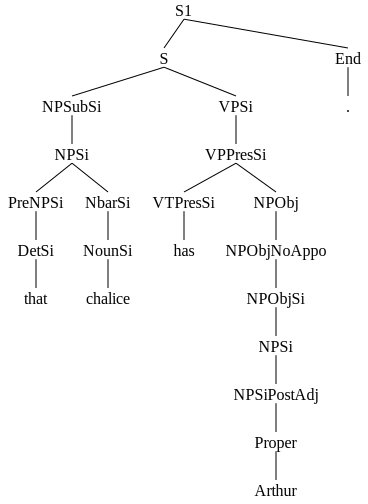

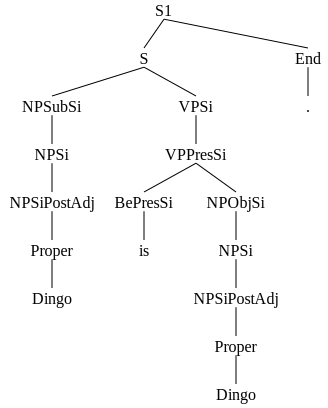

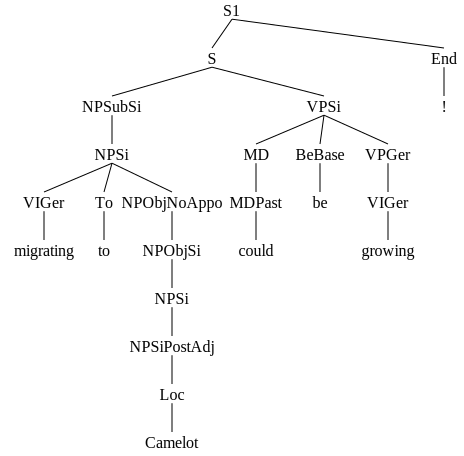

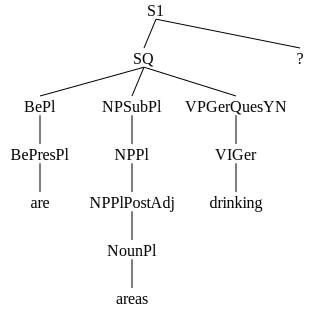

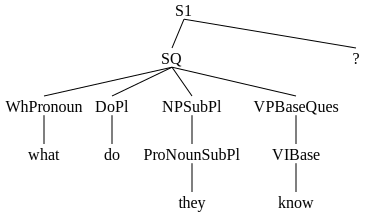

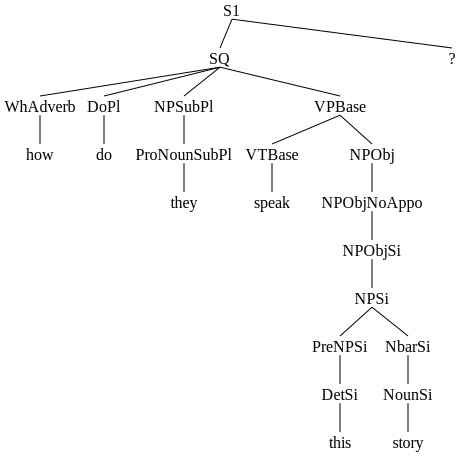

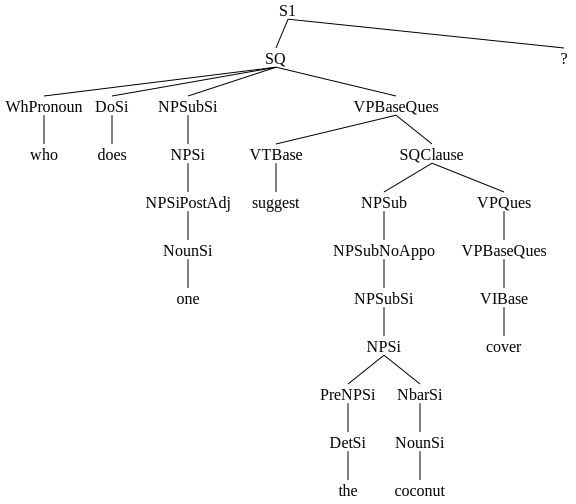

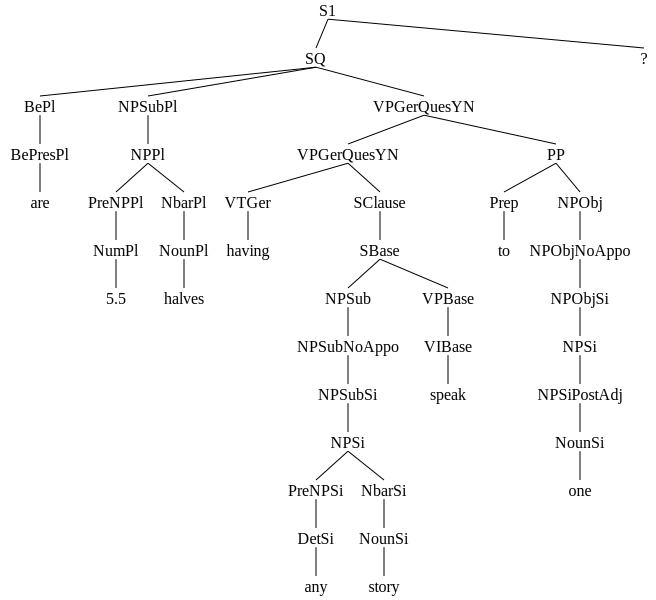

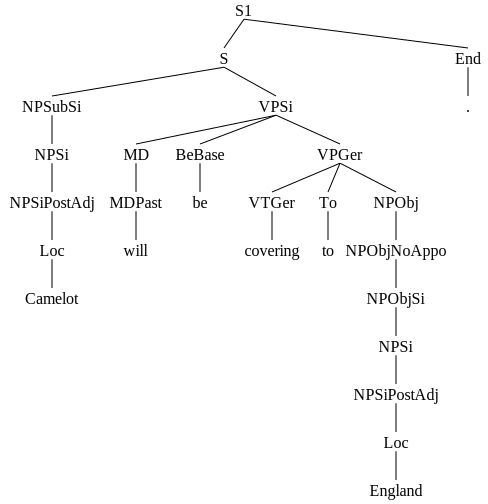

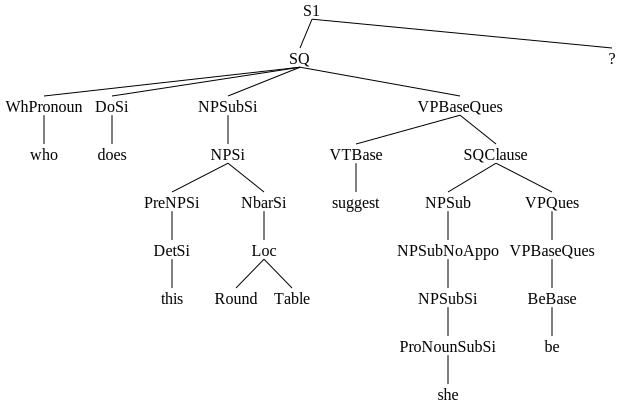

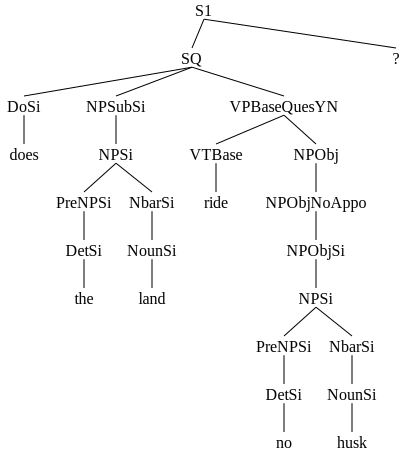

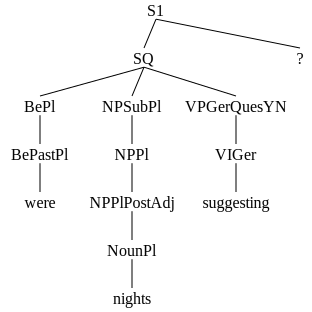

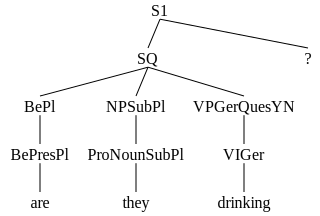

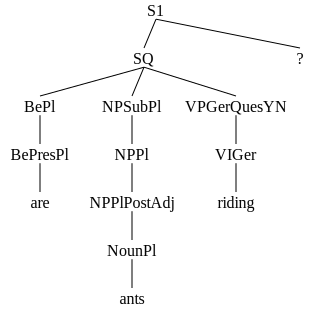

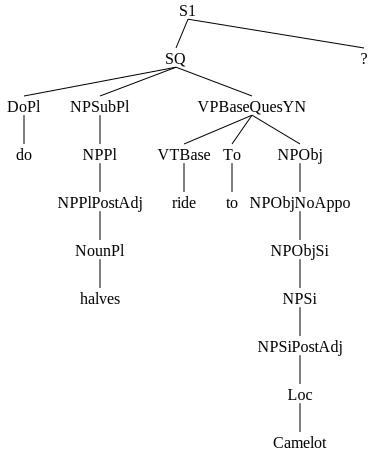

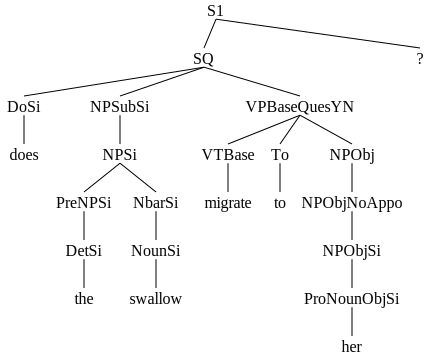

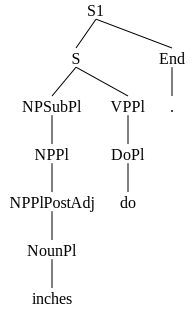

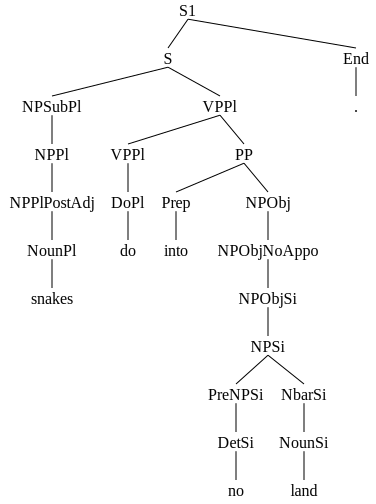

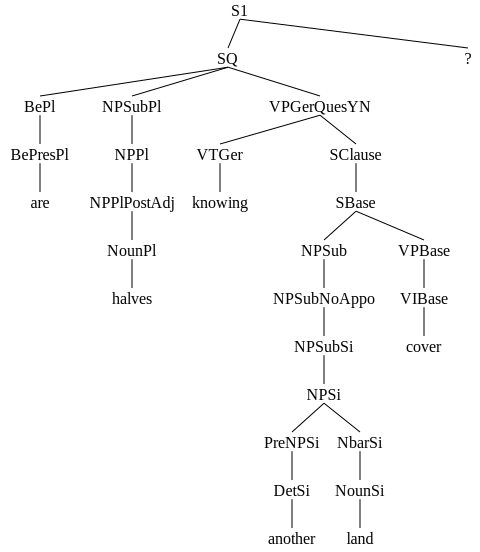

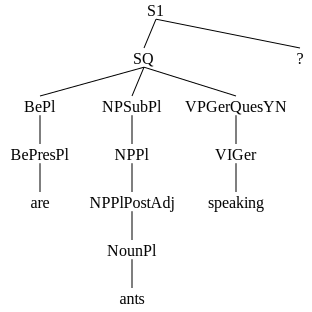

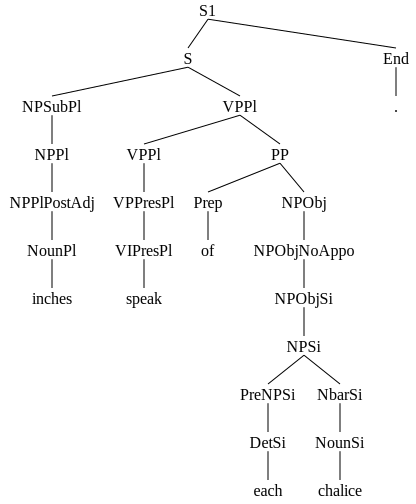

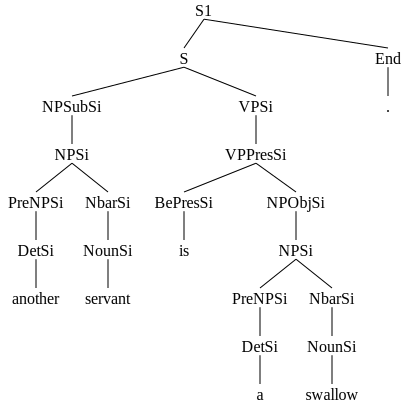

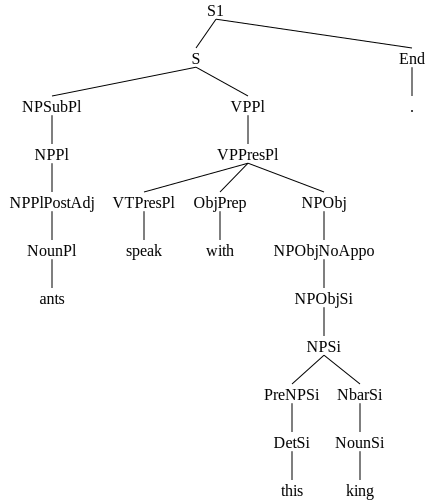

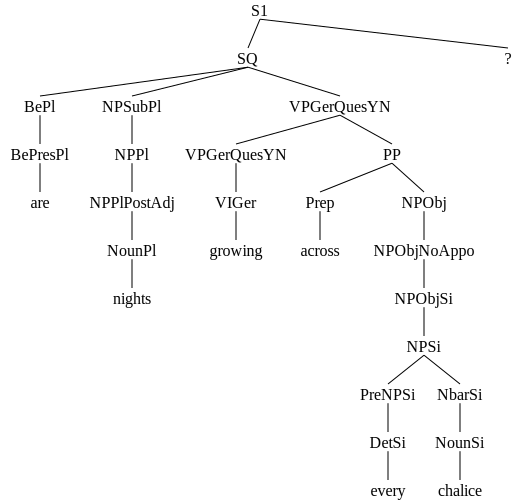

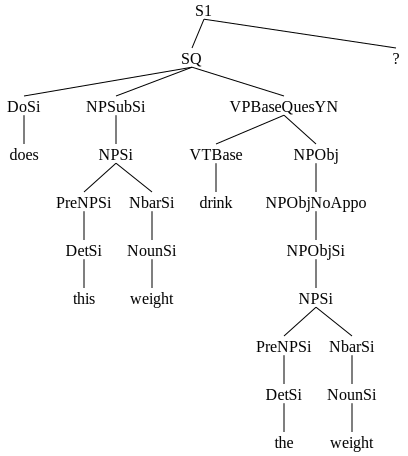

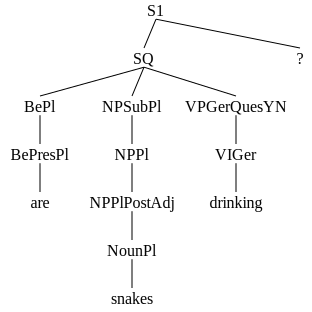

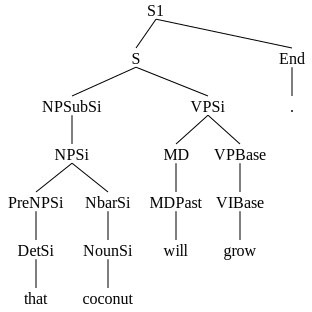

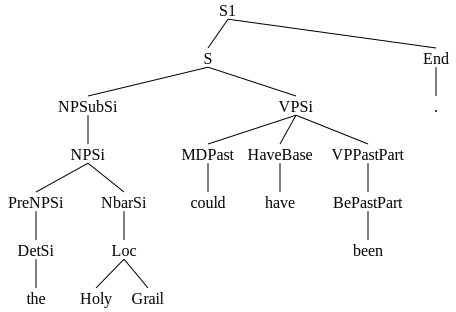

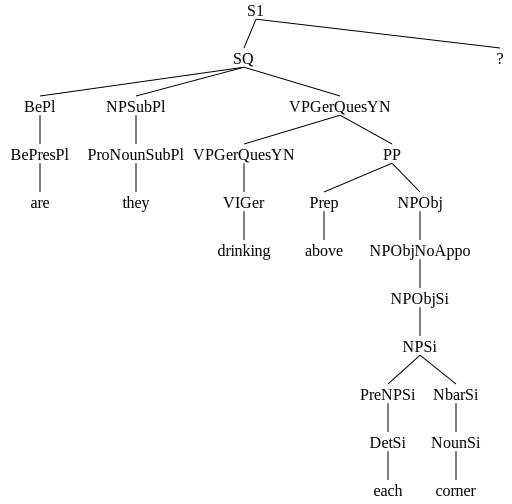

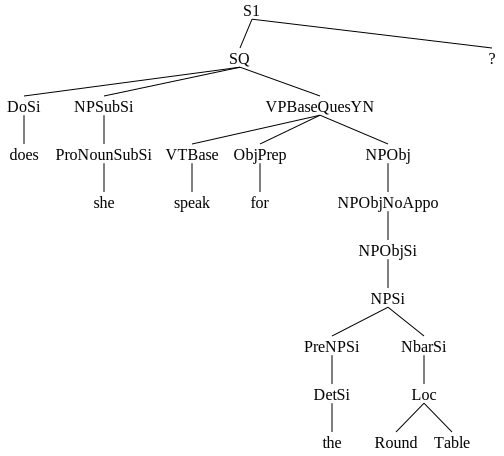

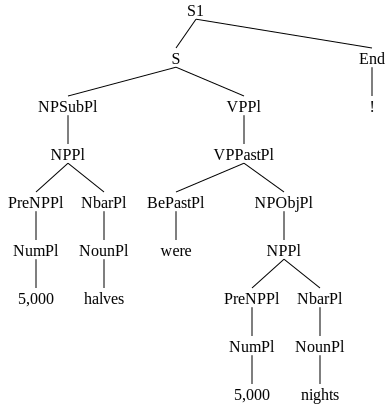

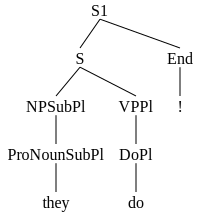

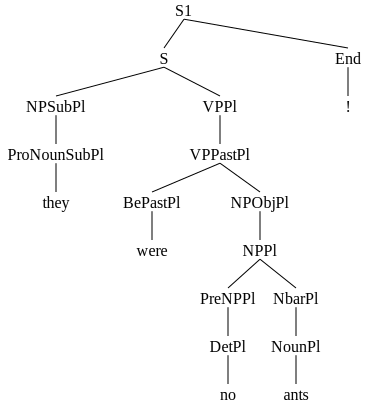

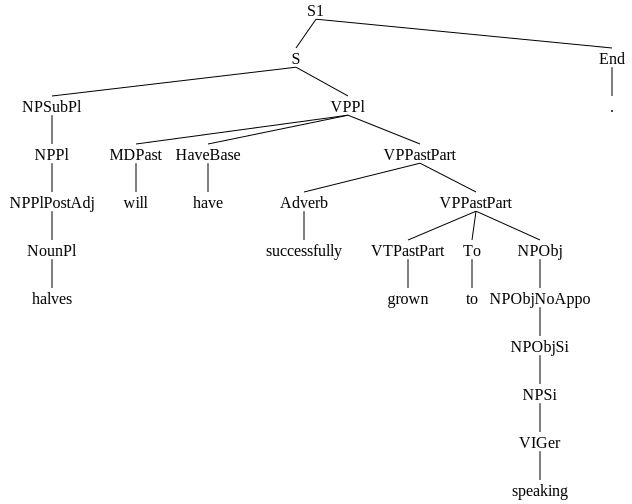

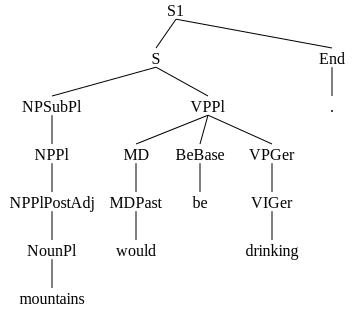

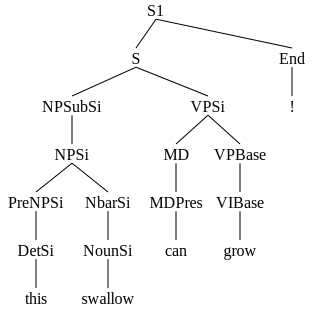

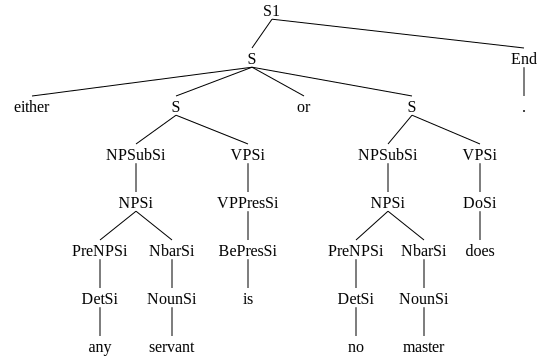

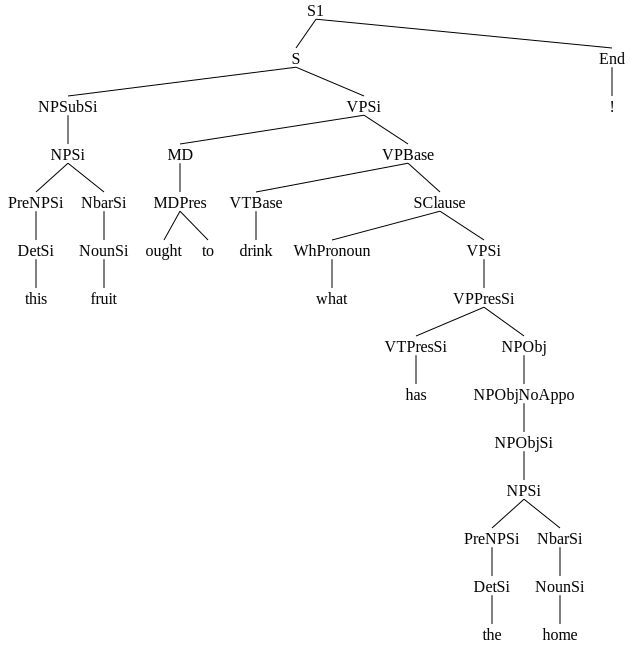

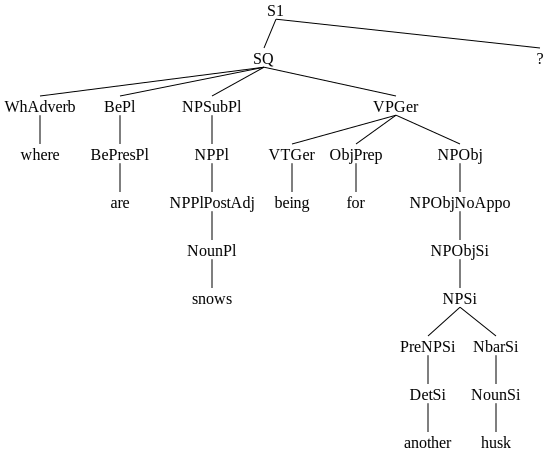

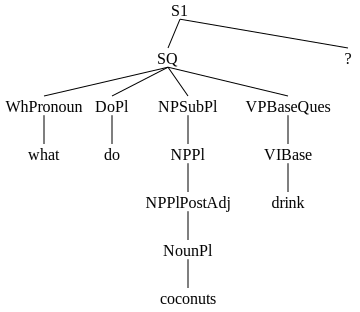

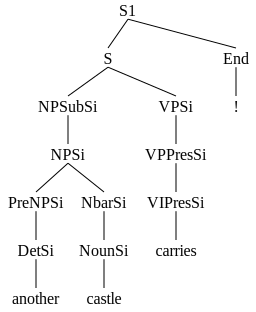

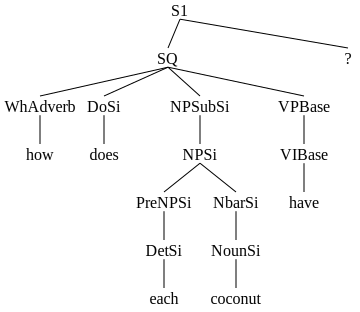

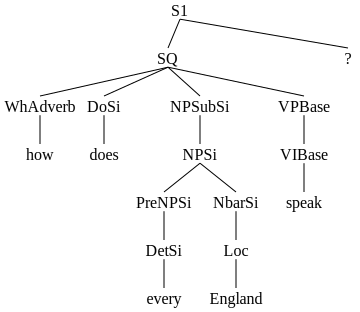

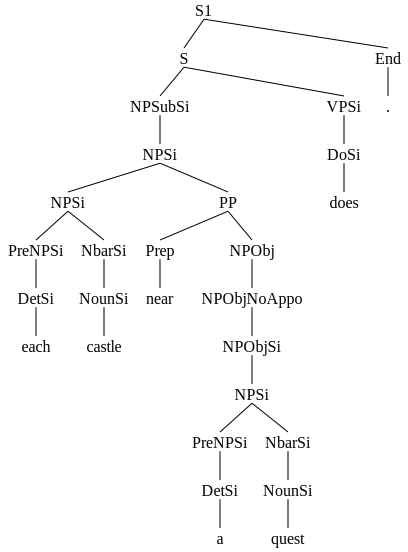

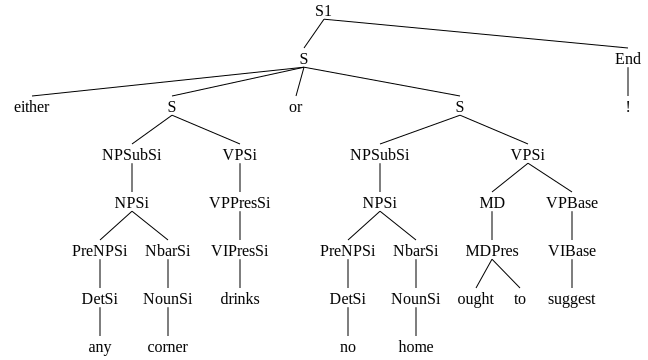

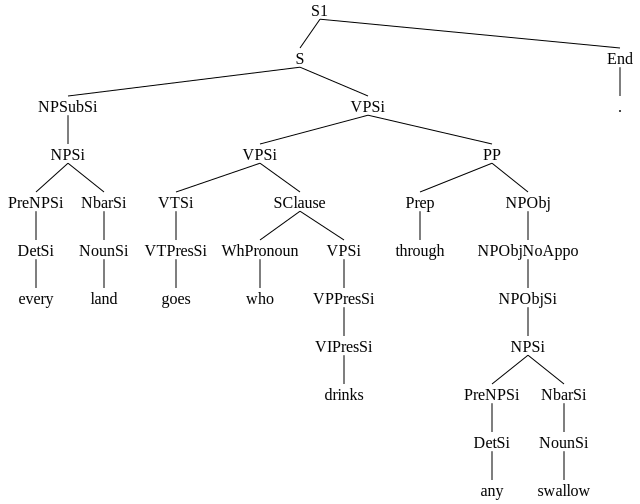

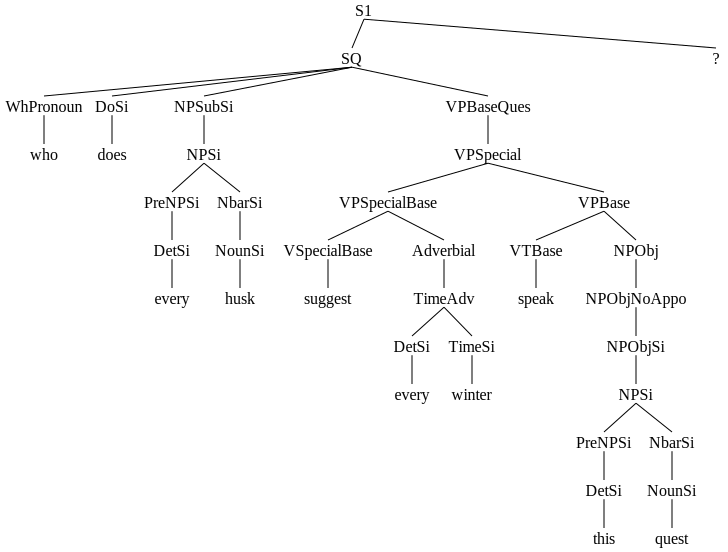

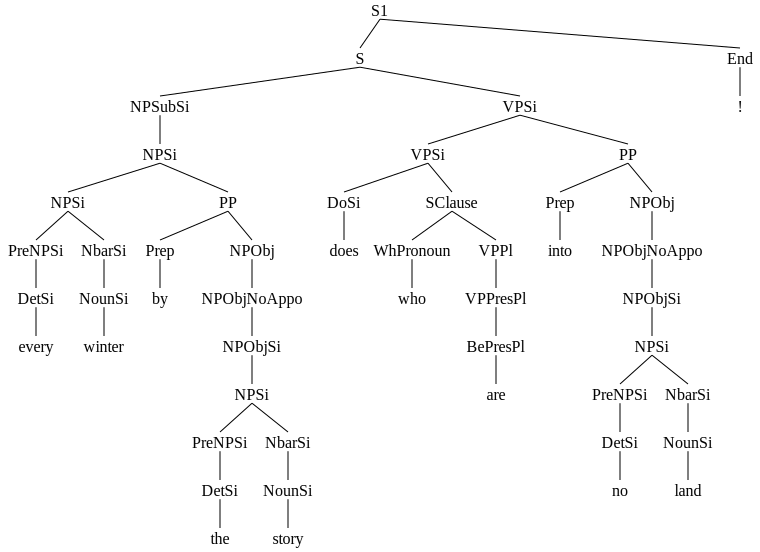

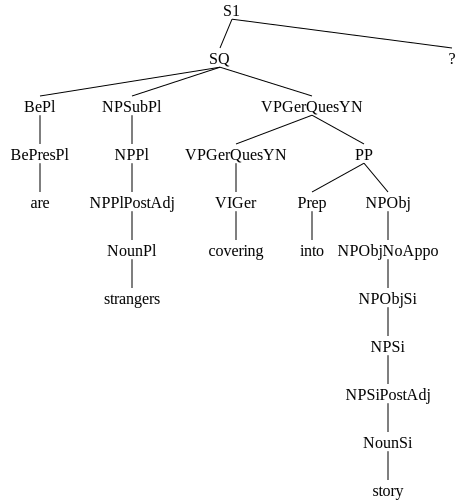

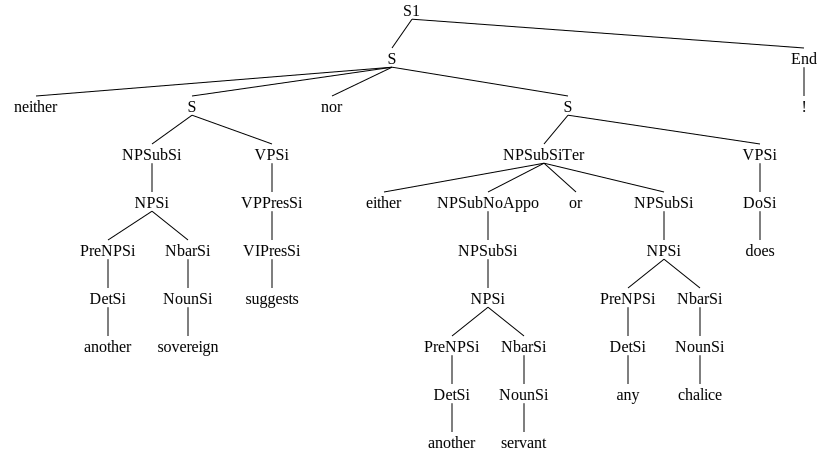

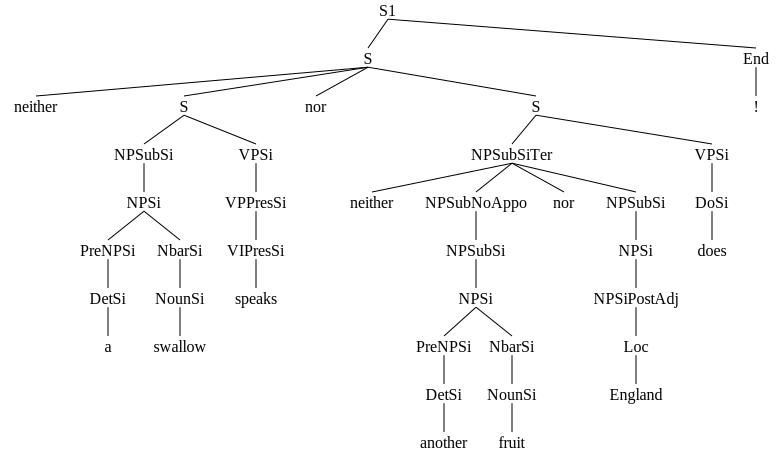

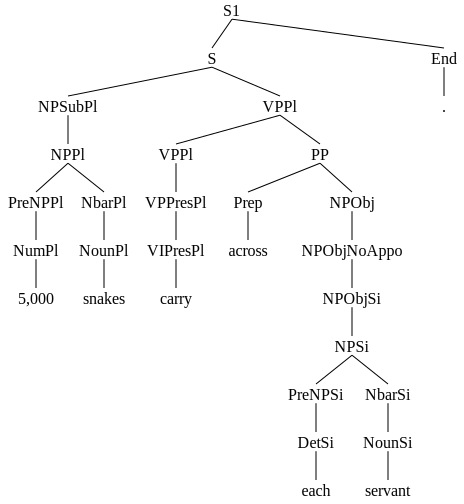

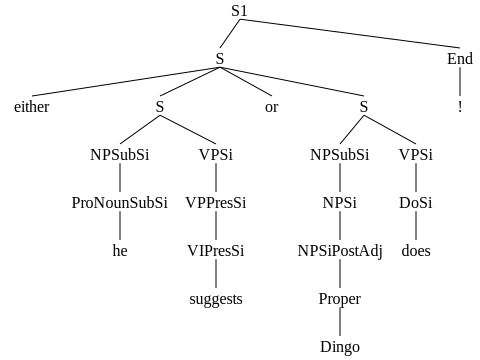

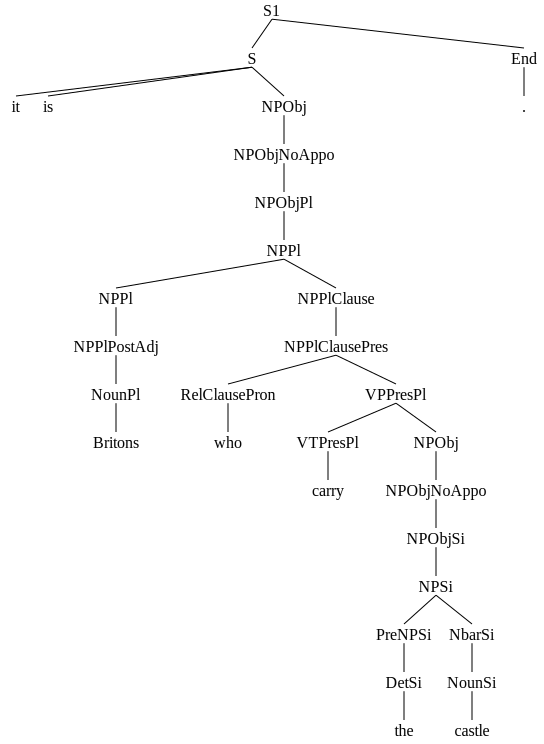

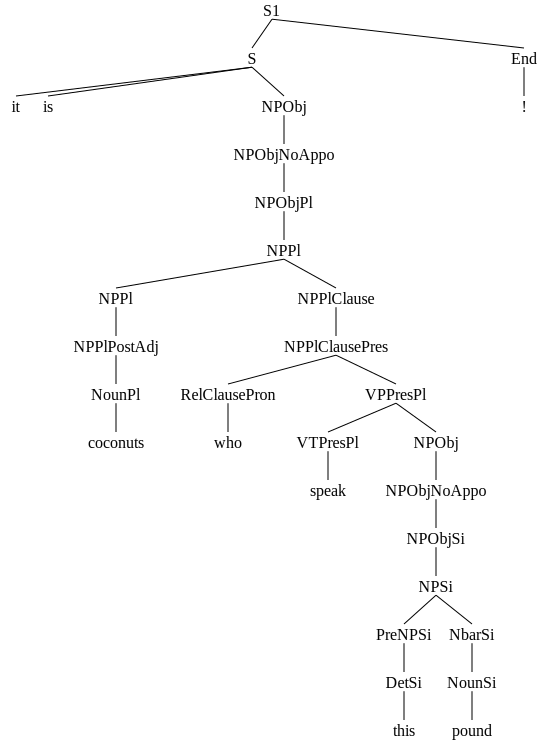

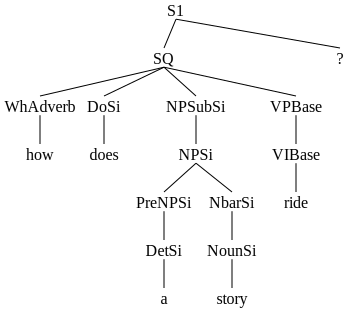

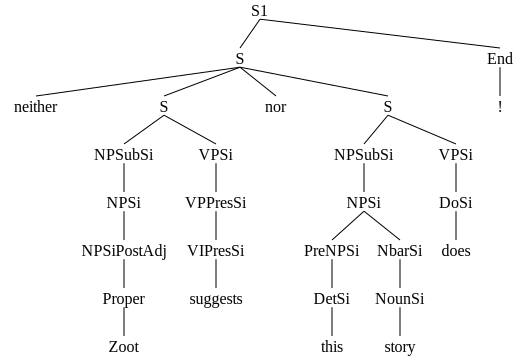

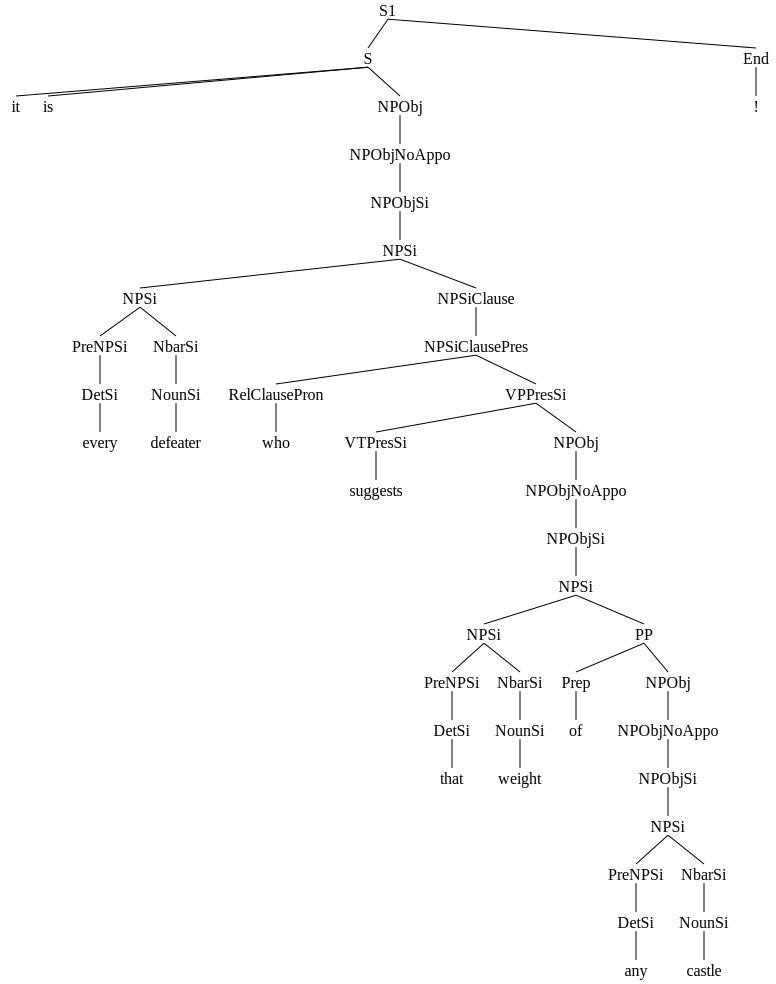

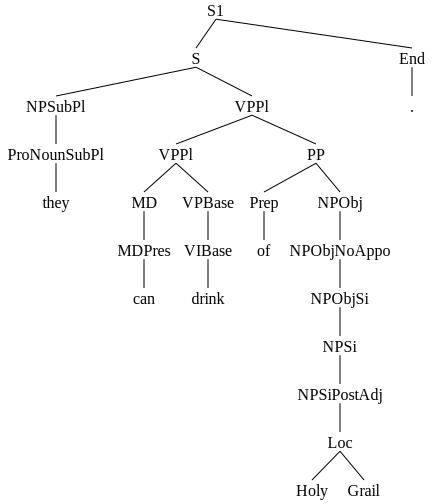

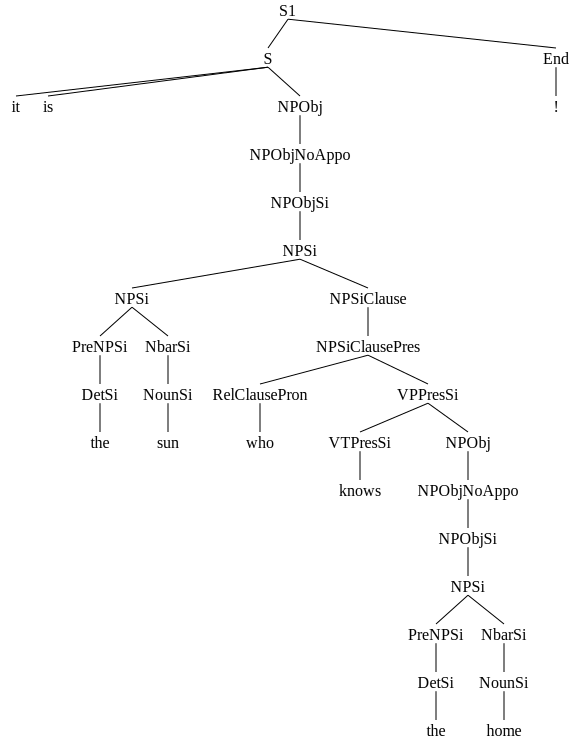

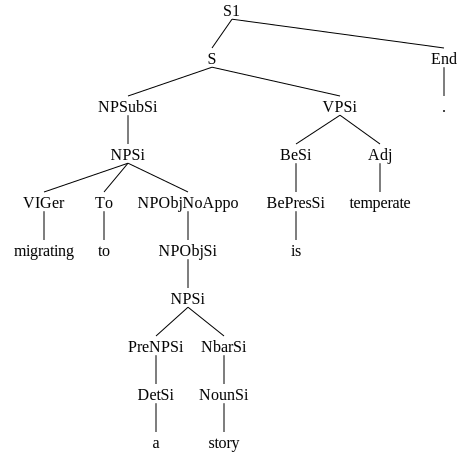

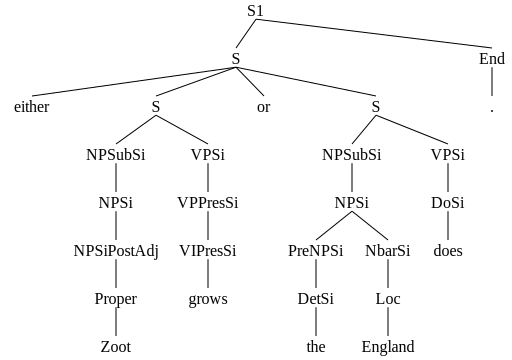

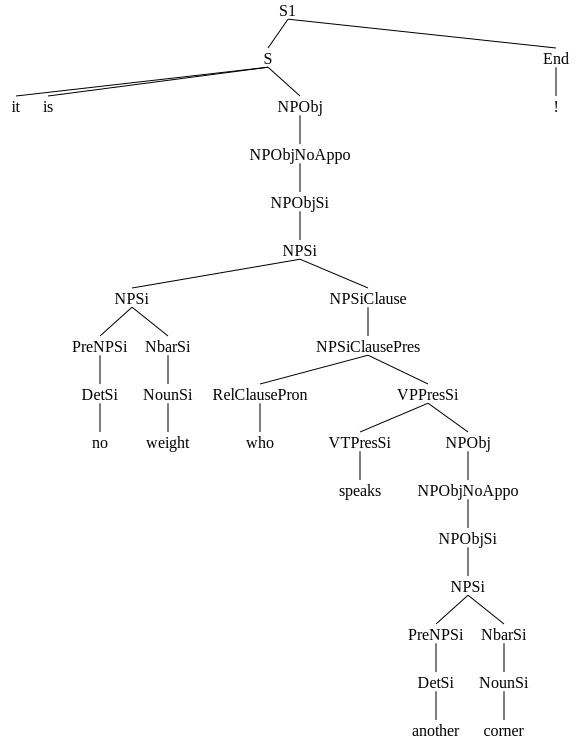

In [9]:
adversarial_trees_PCFG_S1 = []
for tree in adversarial_trees_PCFG:
    adversarial_trees_PCFG_S1.append(tree[0])
    display(tree[0])

In [10]:
import pickle

save_dir = "D:\\MIT\\Courses\\2023-Spring\\6.8630-NLP\\Final Project\\LLM CGW\\All Parse Trees\\Trees"

with open(save_dir+'\\PCFG_Adversarial_Trees.pkl', 'wb') as f:
    pickle.dump(adversarial_trees_PCFG_S1, f)